# compute AGI based on annual fields 
# present-day vs future
# use AGIcrit, Tpref, O2thresh as calculated from monthly hist. clim.
# plot habitat overlap between AA toothfish and others
# Fig.6 & Fig.7 in paper

In [1]:
#get_ipython().system(u'jupyter nbconvert --to=python plot_AGI_toothfish_present_vs_future_AGI_habitat_overlap.ipynb')

In [2]:

import xarray as xr
import numpy as np
import sys, os
from pathlib import Path
import glob
import matplotlib.pyplot as plt


In [3]:
#-----
# based on python code provided by Anne
#-----

basepath="/pscratch/sd/c/cnissen/AGI_toothfish_project/" 
no_species=29

# Init
species_names         = [None] * no_species # empty list
species_names_        = [None] * no_species # empty list
habitat_file_names    = [None] * no_species # empty list

habitat_files = Path(basepath + "all_prey_plus_toothfish/").glob('*_boolean.nc')  # updated habitat files, Nov 2022!!!!!!
#habitat_files = Path(basepath + "share/").glob('*_boolean.nc') 
# Note: I changed name of file of Antimora_rostrata to *boolean2.nc, so that it won't be included here
for ifile,file in enumerate(habitat_files):   
    habitat_file_names[ifile]    = str(file)
    # Get the species name from the full pathname with a space between
    species_names[ifile]  = '_'.join(os.path.basename(file).split('_')[:-2]).replace('_',' ') 
    if not species_names[ifile] in ['Galiteuthis glacialis','Mesonychoteuthis hamiltoni','Kondakovia longimana']:
        species_names[ifile] = species_names[ifile][8:] # get rid of "Default" or "Reviewed"
    if species_names[ifile][0].isspace():  # get rid of white space if there is any
        species_names[ifile] = species_names[ifile][1:]
    if species_names[ifile] in ['Chionobathyscus dewitti All Suitable Habitat']:
        species_names[ifile] = species_names[ifile][0:23]
    # Get the species name from the full pathname with _ in it
    species_names_[ifile] = species_names[ifile].replace(' ','_')  #'_'.join(os.path.basename(file).split('_')[:-2]) 

#print(habitat_file_names)
print(species_names)
print(len(species_names),'species')
print(species_names_)

species_names_no_toothfish = ['Trematomus loennbergii', 'Macrourus whitsoni', 'Galiteuthis glacialis',\
                              'Chionodraco hamatus', 'Anotopterus vorax', 'Chaenodraco wilsoni',\
                              'Kondakovia longimana', 'Cryodraco antarcticus', 'Muraenolepis microps',\
                              'Psychroteuthis glacialis', 'Gymnodraco acuticeps', 'Amblyraja georgiana',\
                              'Antarctomysis maxima', 'Lepidonotothen squamifrons', 'Mesonychoteuthis hamiltoni',\
                              'Pleuragramma antarctica', 'Euphausia superba', 'Notothenia coriiceps',\
                              'Trematomus lepidorhinus', 'Pagothenia borchgrevinki', 'Lycenchelys aratrirostris',\
                              'Neopagetopsis ionah', 'Chaenocephalus aceratus', 'Trematomus hansoni',\
                              'Chionobathyscus dewitti', 'Euphausia crystallorophias', 'Notothenia rossii',\
                              'Bathyraja maccaini']


['Dissostichus mawsoni', 'Trematomus loennbergii', 'Macrourus whitsoni', 'Galiteuthis glacialis', 'Chionodraco hamatus', 'Anotopterus vorax', 'Chaenodraco wilsoni', 'Kondakovia longimana', 'Cryodraco antarcticus', 'Muraenolepis microps', 'Psychroteuthis glacialis', 'Gymnodraco acuticeps', 'Amblyraja georgiana', 'Antarctomysis maxima', 'Lepidonotothen squamifrons', 'Mesonychoteuthis hamiltoni', 'Pleuragramma antarctica', 'Euphausia superba', 'Notothenia coriiceps', 'Trematomus lepidorhinus', 'Pagothenia borchgrevinki', 'Lycenchelys aratrirostris', 'Neopagetopsis ionah', 'Chaenocephalus aceratus', 'Trematomus hansoni', 'Chionobathyscus dewitti', 'Euphausia crystallorophias', 'Notothenia rossii', 'Bathyraja maccaini']
29 species
['Dissostichus_mawsoni', 'Trematomus_loennbergii', 'Macrourus_whitsoni', 'Galiteuthis_glacialis', 'Chionodraco_hamatus', 'Anotopterus_vorax', 'Chaenodraco_wilsoni', 'Kondakovia_longimana', 'Cryodraco_antarcticus', 'Muraenolepis_microps', 'Psychroteuthis_glacialis'

In [4]:
#----
# Species information needed for calculation AGI
#----

# define order of species as contained in depth_min, LWa etc.
species_list = ['Cryodraco antarcticus','Neopagetopsis ionah','Trematomus lepidorhinus',\
               'Trematomus hansoni','Bathyraja maccaini','Chaenocephalus aceratus',\
               'Notothenia coriiceps','Pleuragramma antarctica','Dissostichus mawsoni',\
                'Macrourus whitsoni',\
               'Lepidonotothen squamifrons','Notothenia rossii','Muraenolepis microps',\
               'Chaenodraco wilsoni','Chionobathyscus dewitti',\
               'Galiteuthis glacialis','Mesonychoteuthis hamiltoni','Kondakovia longimana',\
               'Amblyraja georgiana','Anotopterus vorax','Antarctomysis maxima',\
               'Chionodraco hamatus','Euphausia crystallorophias','Euphausia superba','Gymnodraco acuticeps',\
               'Lycenchelys aratrirostris','Pagothenia borchgrevinki','Psychroteuthis glacialis',\
               'Trematomus loennbergii']
print(len(species_list))
# excluded the following species for now: 
# 1) Antimora rostrata: don't have the habitat file (habitat outside of SO)

# NO MAP Bathyraja eatonii	?		15	1500

# Minimum depth of occurence (meter)
depth_min     = [None] * len(species_names) # Initialize
depth_min[0]  = 90   # 'Cryodraco antarcticus'
depth_min[1]  = 20   #'Neopagetopsis ionah'
depth_min[2]  = 272    # 'Trematomus lepidorhinus'
depth_min[3]  = 6    # 'Trematomus hansoni'
depth_min[4]  = 167  # 'Bathyraja maccaini'
depth_min[5]  = 0    # 'Chaenocephalus aceratus'
depth_min[6]  = 0    # 'Notothenia coriiceps'
depth_min[7]  = 0    # 'Pleuragramma antarctica'
depth_min[8]  = 0    # 'Dissostichus mawsoni' ## Assume a wide range for toothfish (max. overlap with prey) ##
depth_min[9]  = 400  # 'Macrourus whitsoni'
depth_min[10] = 10   # 'Lepidonotothen squamifrons'
depth_min[11] = 5    # 'Notothenia rossii'
depth_min[12] = 10   # 'Muraenolepis microps'
depth_min[13] = 200  # 'Chaenodraco wilsoni'
depth_min[14] = 500  # 'Chionobathyscus dewitti'
depth_min[15] = 200   #'Galiteuthis glacialis'
depth_min[16] = 200   # 'Mesonychoteuthis hamiltoni'
depth_min[17] = 500   # 'Kondakovia longimana'
depth_min[18] = 57    # Amblyraja georgiana
depth_min[19] = 358  # Anotopterus vorax
depth_min[20] = 220 # Antarctomysis maxima
depth_min[21] = 76 # Chionodraco hamatus
depth_min[22] = 0 # Euphausia crystallorophias
depth_min[23] = 0 # Euphausia superba
depth_min[24] = 66 # Gymnodraco acuticeps
depth_min[25] = 244 # Lycenchelys aratrirostris
depth_min[26] = 0 # Pagothenia borchgrevinki
depth_min[27] = 385 # Psychroteuthis glacialis
depth_min[28] = 65 # Trematomus loennbergii
#depth_min[29] = # Trematomus eulepidotus #EXCLUDED

# Maximum depth of occurence (meter)
depth_max     = [None] * len(species_names) # Initialize
depth_max[0]  = 600  # 'Cryodraco antarcticus'
depth_max[1]  = 900  #'Neopagetopsis ionah'
depth_max[2]  = 468  # 'Trematomus lepidorhinus'
depth_max[3]  = 549  # 'Trematomus hansoni'
depth_max[4]  = 500  # 'Bathyraja maccaini'
depth_max[5]  = 770  # 'Chaenocephalus aceratus'
depth_max[6]  = 550  # 'Notothenia coriiceps'
depth_max[7]  = 1000 # 'Pleuragramma antarctica'
depth_max[8]  = 2210   # 'Dissostichus mawsoni' ## Assume a wide range for toothfish (max. overlap with prey) ##
depth_max[9]  = 3185 # 'Macrourus whitsoni'
depth_max[10] = 900  # 'Lepidonotothen squamifrons'
depth_max[11] = 350 # 'Notothenia rossii'
depth_max[12] = 1600 # 'Muraenolepis microps'
depth_max[13] = 800  # 'Chaenodraco wilsoni'
depth_max[14] = 2000 # 'Chionobathyscus dewitti'
depth_max[15] = 2500   #'Galiteuthis glacialis'
depth_max[16] =  600  # 'Mesonychoteuthis hamiltoni'
depth_max[17] = 2000   # 'Kondakovia longimana'
depth_max[18] = 173    # Amblyraja georgiana
depth_max[19] = 1059 # Anotopterus vorax
depth_max[20] = 440 # Antarctomysis maxima
depth_max[21] = 271 # Chionodraco hamatus
depth_max[22] = 650 # Euphausia crystallorophias
depth_max[23] = 600 # Euphausia superba
depth_max[24] = 247 # Gymnodraco acuticeps
depth_max[25] = 376 # Lycenchelys aratrirostris
depth_max[26] = 30 # Pagothenia borchgrevinki
depth_max[27] = 610 # Psychroteuthis glacialis
depth_max[28] = 832 # Trematomus loennbergii
#depth_max[29] = # Trematomus eulepidotus EXCLUDED

#---
# NOTE Jan 2023: this info below is not needed anymore with the new AGI formulation!
#----
## LWa extracted 21.07.2022 from FishBase
#LWa     = [None] * len(species_names) # Initialize
#LWa[0]  = 0.0007  # 'Cryodraco antarcticus'
#LWa[1]  = 0.01863  #'Neopagetopsis ionah'
#LWa[2]  = 0.0042  # 'Trematomus eulepidotus'
#LWa[3]  = 0.0021  # 'Trematomus hansoni'
#LWa[4]  = 0.00477  # 'Bathyraja maccaini'
#LWa[5]  = 0.0006 # 'Chaenocephalus aceratus'
#LWa[6]  = 0.0132  # 'Notothenia coriiceps'
#LWa[7]  = 0.0019  # 'Pleuragramma antarctica'
#LWa[8]  = 0.0045   # 'Dissostichus mawsoni'
#LWa[9]  = 0.0135 # 'Macrourus whitsoni'
#LWa[10] = 0.0027  # 'Lepidonotothen squamifrons'
##LWa[11] = 0.001     # 'Antimora rostrata'
#LWa[11] = 0.0093 # 'Notothenia rossii'
#LWa[12] = 0.00437 # 'Muraenolepis microps'
#LWa[13] = 0.0005  # 'Chaenodraco wilsoni'
#LWa[14] = 0.0012 # 'Chionobathyscus dewitti'

## LWb extracted 21.07.2022 from FishBase
#LWb     = [None] * len(species_names) # Initialize
#LWb[0]  = 3.51  # 'Cryodraco antarcticus'
#LWb[1]  = 2.762  #'Neopagetopsis ionah'
#LWb[2]  = 3.32  # 'Trematomus eulepidotus'
#LWb[3]  = 3.52  # 'Trematomus hansoni'
#LWb[4]  = 3.162  # 'Bathyraja maccaini'
#LWb[5]  = 3.63  # 'Chaenocephalus aceratus'
#LWb[6]  = 3.09  # 'Notothenia coriiceps'
#LWb[7]  = 3.41  # 'Pleuragramma antarctica'
#LWb[8]  = 3.24   # 'Dissostichus mawsoni'
#LWb[9]  = 3.15 # 'Macrourus whitsoni'
#LWb[10] = 3.41  # 'Lepidonotothen squamifrons'
##LWb[11] = 3.52   # 'Antimora rostrata'
#LWb[11] = 3.07 # 'Notothenia rossii'
#LWb[12] = 3.11 # 'Muraenolepis microps'
#LWb[13] = 3.79  # 'Chaenodraco wilsoni'
#LWb[14] = 3.5 # 'Chionobathyscus dewitti'

## Linf extracted 21.07.2022 from FishBase
## * Linf estimated from Lmax using Froese and Binohlan (2000) Eq. (5).
#Linf     = [None] * len(species_names) # Initialize
#Linf[0]  = 50.66374052  # 'Cryodraco antarcticus'*
#Linf[1]  = 58.12886422  #'Neopagetopsis ionah'*
#Linf[2]  = 26.5  # 'Trematomus eulepidotus'
#Linf[3]  = 36.5  # 'Trematomus hansoni'
#Linf[4]  = 123.061517  # 'Bathyraja maccaini'*
#Linf[5]  = 70.4  # 'Chaenocephalus aceratus'
#Linf[6]  = 62  # 'Notothenia coriiceps'
#Linf[7]  = 25.1  # 'Pleuragramma antarctica'
#Linf[8]  = 183   # 'Dissostichus mawsoni'
#Linf[9]  = 92 # 'Macrourus whitsoni'
#Linf[10] = 56.7  # 'Lepidonotothen squamifrons'
##Linf[11] = 66   # 'Antimora rostrata'
#Linf[11] = 87 # 'Notothenia rossii'
#Linf[12] = 36.60305736 # 'Muraenolepis microps'*
#Linf[13] = 44.82252387  # 'Chaenodraco wilsoni'*
#Linf[14] = 62.21264207 # 'Chionobathyscus dewitti'*


29


In [5]:
#----
# get indices of depth levels of species
#----

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

file_mesh = '/pscratch/sd/c/cnissen/files_toothfish_project_AGI/Mesh_ancillary_information_v20220919.nc'
data_levels = xr.open_dataset(file_mesh)
levels      = data_levels['depth'].values # 88 levels
data_levels.close()

index_min_depth     = [None] * len(species_names) # Initialize
index_max_depth     = [None] * len(species_names) # Initialize

for i,name in enumerate(species_names):
    # Note Cara: order of entries in depth_min etc. is not alphabetical!!!!
    # here, I have adapted the index from "i" to "iii" to read in the correct depth ranges
    # for the current species
    iii = species_list.index(species_names[i]) # get index of current species as contained in depth_min etc.
    print(species_names[i],species_list[iii])
    index_min_depth[i] = find_nearest(levels,depth_min[iii])
    index_max_depth[i] = find_nearest(levels,depth_max[iii])
    # now, index_min_depth should contain the correct values according to alphabetical order as looped over
    # NOTE: given how python is indexing, I think I then need to index over index_min_depth:index_max_depth+1
    # (was index_min_depth:index_max_depth before)
    

Dissostichus mawsoni Dissostichus mawsoni
Trematomus loennbergii Trematomus loennbergii
Macrourus whitsoni Macrourus whitsoni
Galiteuthis glacialis Galiteuthis glacialis
Chionodraco hamatus Chionodraco hamatus
Anotopterus vorax Anotopterus vorax
Chaenodraco wilsoni Chaenodraco wilsoni
Kondakovia longimana Kondakovia longimana
Cryodraco antarcticus Cryodraco antarcticus
Muraenolepis microps Muraenolepis microps
Psychroteuthis glacialis Psychroteuthis glacialis
Gymnodraco acuticeps Gymnodraco acuticeps
Amblyraja georgiana Amblyraja georgiana
Antarctomysis maxima Antarctomysis maxima
Lepidonotothen squamifrons Lepidonotothen squamifrons
Mesonychoteuthis hamiltoni Mesonychoteuthis hamiltoni
Pleuragramma antarctica Pleuragramma antarctica
Euphausia superba Euphausia superba
Notothenia coriiceps Notothenia coriiceps
Trematomus lepidorhinus Trematomus lepidorhinus
Pagothenia borchgrevinki Pagothenia borchgrevinki
Lycenchelys aratrirostris Lycenchelys aratrirostris
Neopagetopsis ionah Neopaget

In [6]:
#-----
# calculate AGI from annual mean fields
#-----

# constants
d = 0.7 # n.d.; metabolic scaling coefficient
j1 = 4500 # K; "Anabolism activation energy divided by Boltzmann constant" (Clarke2021)
j2 = 8000 # K; "Catabolism activation energy divided by Boltzmann constant" (Clarke2021)
j_diff = j2-j1
# from Clarke2021: "Somatic (or biomass) growth can be expressed as the difference between anabolism and catabolism"

#---
# load AGIcrit, Tpref, O2thresh
#---

# Init
AGI_crit = [None] * no_species # empty list
o2thresh = [None] * no_species # empty list
TPref    = [None] * no_species # empty list

# AGIcrit 
for ii in range(0,len(species_names)):
    file = 'AGIcrit_'+species_names_[ii]+'_based_on_monthly_clim_1995_2014.nc'
    #print(file)
    ff     = xr.open_dataset(basepath+'new_thresholds/'+file)
    AGI_crit[ii]        = ff['AGIcrit'].values[0]
    ff.close()
    
# o2thresh  
for ii in range(0,len(species_names)):
    file = 'o2thresh_'+species_names_[ii]+'_based_on_monthly_clim_1995_2014.nc'
    ff     = xr.open_dataset(basepath+'new_thresholds/'+file)
    o2thresh[ii]        = ff['o2thresh'].values[0]
    ff.close()
    
# TPref 
for ii in range(0,len(species_names)):
    file = 'Tpref_'+species_names_[ii]+'_based_on_monthly_clim_1995_2014.nc'
    print(file)
    ff     = xr.open_dataset(basepath+'new_thresholds/'+file)
    TPref[ii]        = ff['Tpref'].values[0] 
    ff.close()

path3 = '/pscratch/sd/c/cnissen/files_toothfish_project_AGI/simAssp585_monthly/'    
ff     = xr.open_dataset(path3+'t_insitu_fesom_simA_monthly_clim_1995_2014_v2.nc')  
depths = ff['depth'].values
ff.close()

#-----
# NOTE that order of species in LWa etc is not the same as in "species_names"
# account for that further down!!!!
#-----
# UPDATE Jan 2023: the info below is not needed anymore with updated calculation of AGI
# calculate Winf and W for each species
#Winf = np.asarray(LWa)*(np.asarray(Linf)**np.asarray(LWb))
#W    = (1./3.)*Winf
#print('Winf:',Winf)

#print('AGI_crit:',AGI_crit)
#print('o2thresh:',o2thresh)
#print('TPref:',TPref)

#--------
# NOTE: I don't think the order provided in LWa,LWb & Linf matches the order in which AGIcrit etc are loaded here!
# careful when indexing
# -> see above for finding the indices for the depth range!
#--------


Tpref_Dissostichus_mawsoni_based_on_monthly_clim_1995_2014.nc
Tpref_Trematomus_loennbergii_based_on_monthly_clim_1995_2014.nc
Tpref_Macrourus_whitsoni_based_on_monthly_clim_1995_2014.nc
Tpref_Galiteuthis_glacialis_based_on_monthly_clim_1995_2014.nc
Tpref_Chionodraco_hamatus_based_on_monthly_clim_1995_2014.nc
Tpref_Anotopterus_vorax_based_on_monthly_clim_1995_2014.nc
Tpref_Chaenodraco_wilsoni_based_on_monthly_clim_1995_2014.nc
Tpref_Kondakovia_longimana_based_on_monthly_clim_1995_2014.nc
Tpref_Cryodraco_antarcticus_based_on_monthly_clim_1995_2014.nc
Tpref_Muraenolepis_microps_based_on_monthly_clim_1995_2014.nc
Tpref_Psychroteuthis_glacialis_based_on_monthly_clim_1995_2014.nc
Tpref_Gymnodraco_acuticeps_based_on_monthly_clim_1995_2014.nc
Tpref_Amblyraja_georgiana_based_on_monthly_clim_1995_2014.nc
Tpref_Antarctomysis_maxima_based_on_monthly_clim_1995_2014.nc
Tpref_Lepidonotothen_squamifrons_based_on_monthly_clim_1995_2014.nc
Tpref_Mesonychoteuthis_hamiltoni_based_on_monthly_clim_1995_2014

In [7]:
#----
# load data
#----

path = '/pscratch/sd/c/cnissen/AGI_toothfish_project/habitat_overlap/'

year_future1,year_future2 = 2091,2100 # 2091,2100 or 2081,2100 or 2098,2100

# choose: which subregions? which experiment?
region_string = '_shelf_vs_openOcean' # _shelf_vs_openOcean or empty
exp_string    = '' # _O2_EFFECT_ONLY or empty (-> if empty, "normal" experiment ,i.e., future change for temp & O2)
drift_string  = 'monthly_drift_corrected_'+str(year_future1)+'_'+str(year_future2)+'_minus_1995_2014'
drift_string2 = drift_string[8:]

if region_string in ['_shelf_vs_openOcean']:
    subregions = ['all_shelves', 'all_openOcean','wholeSO']
else:
    # Note: keep order as is. Order is hard-coded when writing data to netcdf file!!
    subregions = ['wholeSO','RossSea','WeddellSea','AntarcticPeninsula','Orkney',\
             'EastAntarctica1','EastAntarctica2','EastAntarctica3']

file1 = path+'AGI_based_habitat_overlap_toothfish_vs_prey_whole_water_column_ssp126_'+\
            str(year_future1)+'_'+str(year_future2)+region_string+exp_string+'_'+drift_string+'_v2.nc'
file2 = path+'AGI_based_habitat_overlap_toothfish_vs_prey_whole_water_column_ssp245_'+\
            str(year_future1)+'_'+str(year_future2)+region_string+exp_string+'_'+drift_string+'_v2.nc'
file3 = path+'AGI_based_habitat_overlap_toothfish_vs_prey_whole_water_column_ssp370_'+\
            str(year_future1)+'_'+str(year_future2)+region_string+exp_string+'_'+drift_string+'_v2.nc'
file4 = path+'AGI_based_habitat_overlap_toothfish_vs_prey_whole_water_column_ssp585_'+\
            str(year_future1)+'_'+str(year_future2)+region_string+exp_string+'_'+drift_string+'_v2.nc'
#file5 = path+'AGI_based_habitat_overlap_toothfish_vs_prey_whole_water_column_simB_2090_2099'+region_string+exp_string+'_v2.nc'

# load overlap between toothfish habitat and prey habitat in km3
data_ssp126 = np.zeros([len(subregions),88,len(species_names)-1])
data_ssp245 = np.zeros([len(subregions),88,len(species_names)-1])
data_ssp370 = np.zeros([len(subregions),88,len(species_names)-1])
data_ssp585 = np.zeros([len(subregions),88,len(species_names)-1])
data_hist   = np.zeros([len(subregions),88,len(species_names)-1])
#data_simB_1990s = np.zeros([len(subregions),88,len(species_names)-1])
#data_simB_2090s = np.zeros([len(subregions),88,len(species_names)-1])

# in file: subregions, depth, time
ff   = xr.open_dataset(file1)
counter = 0
for i in range(0,len(species_names)):
    if not species_names[i] in ["Dissostichus mawsoni"]:
        print(species_names[i],species_names_[i])
        data_hist[:,:,counter]   = ff['overlap_'+species_names_[i]].values[:,:,0] # present-day
        data_ssp126[:,:,counter] = ff['overlap_'+species_names_[i]].values[:,:,1] # future
        counter = counter+1
ff.close()

ff   = xr.open_dataset(file2)
counter = 0
for i in range(0,len(species_names)):
    if not species_names[i] in ["Dissostichus mawsoni"]:
        data_ssp245[:,:,counter] = ff['overlap_'+species_names_[i]].values[:,:,1] # future
        counter = counter+1
ff.close()


ff   = xr.open_dataset(file3)
counter = 0
for i in range(0,len(species_names)):
    if not species_names[i] in ["Dissostichus mawsoni"]:
        data_ssp370[:,:,counter] = ff['overlap_'+species_names_[i]].values[:,:,1] # future
        counter = counter+1
ff.close()

ff   = xr.open_dataset(file4)
counter = 0
for i in range(0,len(species_names)):
    if not species_names[i] in ["Dissostichus mawsoni"]:
        data_ssp585[:,:,counter] = ff['overlap_'+species_names_[i]].values[:,:,1] # future
        counter = counter+1
ff.close()

## control sim
#ff   = xr.open_dataset(file5)
#counter = 0
#for i in range(0,len(species_names)):
#    if not species_names[i] in ["Dissostichus mawsoni"]:
#        data_simB_1990s[:,:,counter] = ff['overlap_'+species_names_[i]].values[:,:,0] # present-day
#        data_simB_2090s[:,:,counter] = ff['overlap_'+species_names_[i]].values[:,:,1] # future
#        counter = counter+1
#ff.close()

print('data_ssp585.shape',data_ssp585.shape)
print('done')


Trematomus loennbergii Trematomus_loennbergii
Macrourus whitsoni Macrourus_whitsoni
Galiteuthis glacialis Galiteuthis_glacialis
Chionodraco hamatus Chionodraco_hamatus
Anotopterus vorax Anotopterus_vorax
Chaenodraco wilsoni Chaenodraco_wilsoni
Kondakovia longimana Kondakovia_longimana
Cryodraco antarcticus Cryodraco_antarcticus
Muraenolepis microps Muraenolepis_microps
Psychroteuthis glacialis Psychroteuthis_glacialis
Gymnodraco acuticeps Gymnodraco_acuticeps
Amblyraja georgiana Amblyraja_georgiana
Antarctomysis maxima Antarctomysis_maxima
Lepidonotothen squamifrons Lepidonotothen_squamifrons
Mesonychoteuthis hamiltoni Mesonychoteuthis_hamiltoni
Pleuragramma antarctica Pleuragramma_antarctica
Euphausia superba Euphausia_superba
Notothenia coriiceps Notothenia_coriiceps
Trematomus lepidorhinus Trematomus_lepidorhinus
Pagothenia borchgrevinki Pagothenia_borchgrevinki
Lycenchelys aratrirostris Lycenchelys_aratrirostris
Neopagetopsis ionah Neopagetopsis_ionah
Chaenocephalus aceratus Chaeno

In [8]:
print(data_ssp585.shape)
print(data_ssp585[-1,:,3])


(3, 88, 28)
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.0249582  0.02507946 0.03370855
 0.03406597 0.02703896 0.02806182 0.02903692 0.03025055 0.03163658
 0.03415414 0.03654274 0.03866876 0.04066189 0.04247587        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]


In [9]:
#---
# sort all variables ot plot by depth_min
#---

#!!!!!!!!
# NOTE: depth_min is sorted according to species_list
#       data_* is sorted according to species_names
#!!!!!!!!
# Be very careful when sorting the arrays!!
# (that's why there is currently lots of output printed to the screen)

# get index of toothfish
ind_toothfish = species_list.index('Dissostichus mawsoni')
# delete toothfish from list
depth_min2 = np.delete(depth_min,ind_toothfish)
depth_max2 = np.delete(depth_max,ind_toothfish)
species_list2 = np.delete(species_list,ind_toothfish)
# sort all the others based on depth_min
ind_sort = np.argsort(depth_min2)
depth_min2 = depth_min2[ind_sort]
depth_max2 = depth_max2[ind_sort]
species_list2 = species_list2[ind_sort]
# for plotting, add toothfish back to the list of labels
#species_list2 = np.hstack(('Dissostichus mawsoni',species_list2))
#print(species_list2)

data_ssp585_b = np.copy(data_ssp585)
data_ssp370_b = np.copy(data_ssp370)
data_ssp245_b = np.copy(data_ssp245)
data_ssp126_b = np.copy(data_ssp126)
data_hist_b   = np.copy(data_hist)
#data_simB_1990s_b   = np.copy(data_simB_1990s)
#data_simB_2090s_b   = np.copy(data_simB_2090s)

#index_list = np.zeros([len(species_names_no_toothfish)])
#for i in range(0,len(species_names_no_toothfish)):
#    index_list[i] = list(species_list2).index(species_names_no_toothfish[i])
#    #print(i,species_names_no_toothfish[i],iii,species_list2[iii])
#index_list = np.asarray([int(x) for x in index_list])

for i in range(0,len(species_names_no_toothfish)):
    iii = list(species_list2).index(species_names_no_toothfish[i])
    print(i,species_names_no_toothfish[i],iii,species_list2[iii])
    data_ssp585_b[:,:,iii] = data_ssp585[:,:,i]
    data_ssp370_b[:,:,iii] = data_ssp370[:,:,i]
    data_ssp245_b[:,:,iii] = data_ssp245[:,:,i]
    data_ssp126_b[:,:,iii] = data_ssp126[:,:,i]
    data_hist_b[:,:,iii] = data_hist[:,:,i]
    #data_simB_1990s_b[:,:,iii] = data_simB_1990s[:,:,i]
    #data_simB_2090s_b[:,:,iii] = data_simB_2090s[:,:,i]

#data_ssp585_b = np.take(data_ssp585_b, index_list, axis=2)
#data_ssp370_b = np.take(data_ssp370_b, index_list, axis=2)
#data_ssp245_b = np.take(data_ssp245_b, index_list, axis=2)
#data_ssp126_b = np.take(data_ssp126_b, index_list, axis=2)
#data_hist_b   = np.take(data_hist_b, index_list, axis=2)

print('')
print(depths[5])
print('')
for mm in range(0,len(species_names_no_toothfish)):
    print(species_names_no_toothfish[mm],data_ssp585[1,5,mm])

print('')
for mm in range(0,len(species_names_no_toothfish)):
    print(species_list2[mm],data_ssp585_b[1,5,mm])


0 Trematomus loennbergii 12 Trematomus loennbergii
1 Macrourus whitsoni 25 Macrourus whitsoni
2 Galiteuthis glacialis 17 Galiteuthis glacialis
3 Chionodraco hamatus 14 Chionodraco hamatus
4 Anotopterus vorax 23 Anotopterus vorax
5 Chaenodraco wilsoni 18 Chaenodraco wilsoni
6 Kondakovia longimana 26 Kondakovia longimana
7 Cryodraco antarcticus 15 Cryodraco antarcticus
8 Muraenolepis microps 9 Muraenolepis microps
9 Psychroteuthis glacialis 24 Psychroteuthis glacialis
10 Gymnodraco acuticeps 13 Gymnodraco acuticeps
11 Amblyraja georgiana 11 Amblyraja georgiana
12 Antarctomysis maxima 20 Antarctomysis maxima
13 Lepidonotothen squamifrons 8 Lepidonotothen squamifrons
14 Mesonychoteuthis hamiltoni 19 Mesonychoteuthis hamiltoni
15 Pleuragramma antarctica 3 Pleuragramma antarctica
16 Euphausia superba 4 Euphausia superba
17 Notothenia coriiceps 2 Notothenia coriiceps
18 Trematomus lepidorhinus 22 Trematomus lepidorhinus
19 Pagothenia borchgrevinki 0 Pagothenia borchgrevinki
20 Lycenchelys ara

(30,)

savepath1: /global/cfs/cdirs/m4003/cnissen/Plots/AGI_project/habitat_overlap_v4_with_drift_corr/



/tmp/ipykernel_585952/2762820999.py:94: RuntimeWarning: invalid value encountered in true_divide
  data_habitat_loss[0,:,dd] = 100*np.nansum(data_ssp585_b[rr,ind_depths,:],axis=0)/np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
/tmp/ipykernel_585952/2762820999.py:95: RuntimeWarning: invalid value encountered in true_divide
  data_habitat_loss[1,:,dd] = 100*np.nansum(data_ssp370_b[rr,ind_depths,:],axis=0)/np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
/tmp/ipykernel_585952/2762820999.py:96: RuntimeWarning: invalid value encountered in true_divide
  data_habitat_loss[2,:,dd] = 100*np.nansum(data_ssp245_b[rr,ind_depths,:],axis=0)/np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
/tmp/ipykernel_585952/2762820999.py:97: RuntimeWarning: invalid value encountered in true_divide
  data_habitat_loss[3,:,dd] = 100*np.nansum(data_ssp126_b[rr,ind_depths,:],axis=0)/np.nansum(data_hist_b[rr,ind_depths,:],axis=0)


ssp585 / 400-700m: Chaenocephalus aceratus 3.7282912992195776
ssp585 / 400-700m: Notothenia coriiceps -1.2721185970785314
ssp585 / 400-700m: Pleuragramma antarctica -10.84791477017356
ssp585 / 400-700m: Euphausia superba -13.481668410844165
ssp585 / 400-700m: Euphausia crystallorophias -16.05934780049718
ssp585 / 400-700m: Trematomus hansoni -3.9051204960097294
ssp585 / 400-700m: Lepidonotothen squamifrons -3.0264412956858138
ssp585 / 400-700m: Muraenolepis microps -4.591738798380376
ssp585 / 400-700m: Neopagetopsis ionah -9.99328299882832
ssp585 / 400-700m: Trematomus loennbergii -12.338875649802631
ssp585 / 400-700m: Cryodraco antarcticus -7.523276571575096
ssp585 / 400-700m: Bathyraja maccaini 10.098739440027302
ssp585 / 400-700m: Galiteuthis glacialis -18.75308472702467
ssp585 / 400-700m: Chaenodraco wilsoni -7.295251843491016
ssp585 / 400-700m: Mesonychoteuthis hamiltoni -22.317156347304746
ssp585 / 400-700m: Antarctomysis maxima 6.1380756689958105
ssp585 / 400-700m: Trematomus le

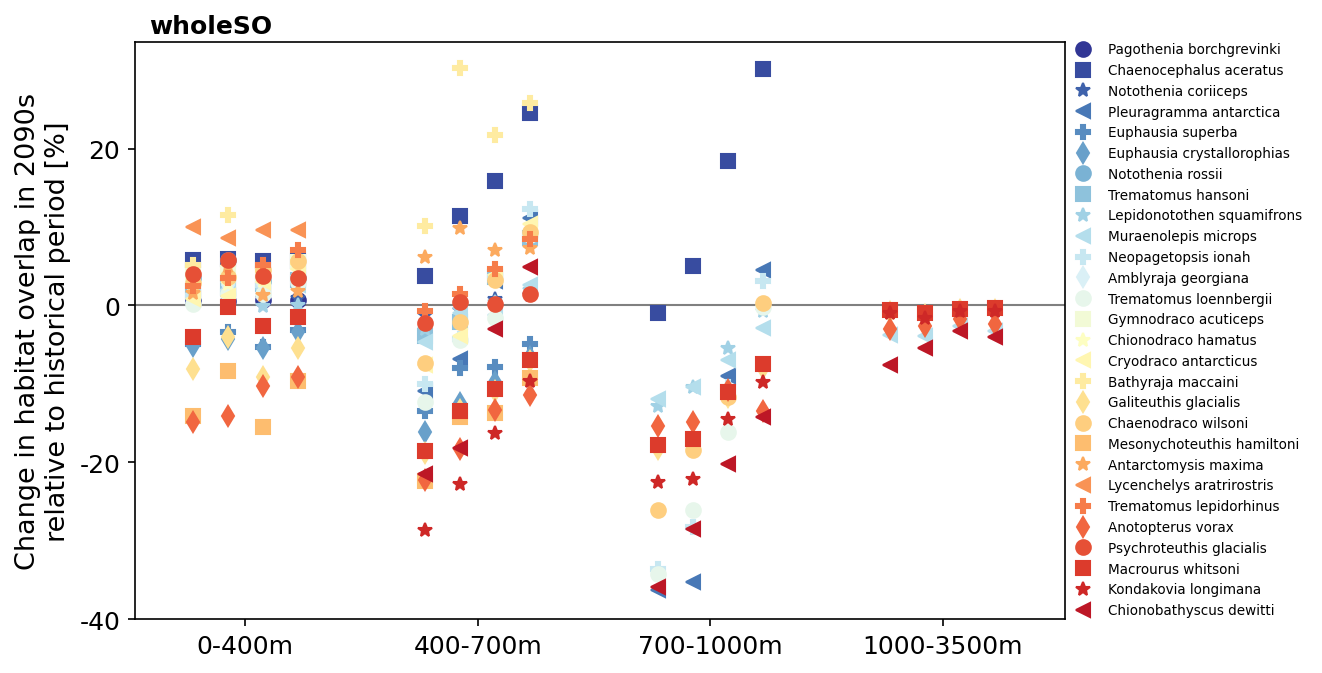

In [10]:
#---
# plot
#---

color_future1 = 'darkblue'
color_future2 = 'mediumturquoise'
color_future3 = 'cornflowerblue'
color_future4 = 'mediumpurple'
    
ec = 'k'
color_line1 = 'k'
color_line2 = 'grey'
lw = 1 # for horizontal line: 100%
lw2 = 0.45 # for all other horizontal lines
width1 = 0.15
shift = 0.18
fs = 11

#color_list = ['yellow','mediumpurple','lightgreen','orangered','mediumturquoise','cornflowerblue',\
#             'slateblue','lightsteelblue','red','pink','lightgrey','forestgreen','brown','orange',\
#             'darkviolet','lightcoral','firebrick','palegreen','black','palevioletred','navy',\
#             'papayawhip','indigo','cyan','bisque','tan','khaki','maroon','darksalmon','olive']
#color_list = 30*color_list
#print ('Available colors:',len(color_list))

cm = plt.get_cmap('RdYlBu_r')
indc = np.arange(0,256+9,9)
print(indc.shape)
color_list = [cm(indc[0])[0:3],cm(indc[1])[0:3],cm(indc[2])[0:3],cm(indc[3])[0:3],cm(indc[4])[0:3],\
             cm(indc[5])[0:3],cm(indc[6])[0:3],cm(indc[7])[0:3],cm(indc[8])[0:3],cm(indc[9])[0:3],\
             cm(indc[10])[0:3],cm(indc[11])[0:3],cm(indc[12])[0:3],cm(indc[13])[0:3],cm(indc[14])[0:3],\
             cm(indc[15])[0:3],cm(indc[16])[0:3],cm(indc[17])[0:3],cm(indc[18])[0:3],cm(indc[19])[0:3],\
             cm(indc[20])[0:3],cm(indc[21])[0:3],cm(indc[22])[0:3],cm(indc[23])[0:3],cm(indc[24])[0:3],\
             cm(indc[25])[0:3],cm(indc[26])[0:3],cm(indc[27])[0:3],cm(indc[28])[0:3],cm(indc[29])[0:3]]

symbols_list = ['o','s','*','<','P','d',\
               'o','s','*','<','P','d',\
               'o','s','*','<','P','d',\
                'o','s','*','<','P','d',\
               'o','s','*','<','P','d']

save_plots = False
display_plots = True 
plot_eps = False

savepath1     = '/global/cfs/cdirs/m4003/cnissen/Plots/AGI_project/habitat_overlap_v4_with_drift_corr/'
# check existence of paths
if not os.path.exists(savepath1):
    print ('Created '+savepath1)
    os.makedirs(savepath1)
    
savepath2     = savepath1+'eps/'
# check existence of paths
if not os.path.exists(savepath2):
    print ('Created '+savepath2)
    os.makedirs(savepath2)
    
#year_future1,year_future2
if ((year_future1==2081) & (year_future2==2100)) | ((year_future1==2098) & (year_future2==2100)):
    savepath1 = savepath1+'sensitivity_'+str(year_future1)+'_'+str(year_future2)+'/'
    if not os.path.exists(savepath1):
        print ('Created '+savepath1)
        os.makedirs(savepath1)
    savepath2     = savepath1+'eps/'
    if not os.path.exists(savepath2):
        print ('Created '+savepath2)
        os.makedirs(savepath2)

print()
print('savepath1:',savepath1)
print()

## first version
#depth_list1 = [0,250,750,1500]
#depth_list2 = [250,750,1500,3500]
# second version (guided by environmental change in toothfish habitat)
depth_list1 = [0,  400,700,1000]
depth_list2 = [400,700,1000,3500]

data_habitat_loss = np.zeros([5,len(species_names_no_toothfish),len(depth_list1)])

xlim1,xlim2 = -0.25,len(depth_list1)-0.25
ms = 7
fs = 12

factor = 1

for rr in range(2,3):#,len(subregions)):
    
    # get all overlap loss numbers for current subregion
    for dd in range(0,len(depth_list1)):
        depth1,depth2 = depth_list1[dd],depth_list2[dd] #750,1500 #250,750 #0,250 #1000,2000 #0,3000
        ind_depths = np.where((depths>depth1) & (depths<=depth2))[0]
        data_habitat_loss[0,:,dd] = 100*np.nansum(data_ssp585_b[rr,ind_depths,:],axis=0)/np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
        data_habitat_loss[1,:,dd] = 100*np.nansum(data_ssp370_b[rr,ind_depths,:],axis=0)/np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
        data_habitat_loss[2,:,dd] = 100*np.nansum(data_ssp245_b[rr,ind_depths,:],axis=0)/np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
        data_habitat_loss[3,:,dd] = 100*np.nansum(data_ssp126_b[rr,ind_depths,:],axis=0)/np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
        #data_habitat_loss[4,:,dd] = 100*np.nansum(data_simB_2090s_b[rr,ind_depths,:],axis=0)/np.nansum(data_simB_1990s_b[rr,ind_depths,:],axis=0)

    #---
    # change in overlap
    #---
    fig7, ax1 = plt.subplots(num=2, figsize=(8,5), dpi=150, facecolor='w', edgecolor='k')
    plt.hlines(0,xlim1,xlim2,color='grey',linewidth=1)
    
    # loop over depth ranges and species for plotting
    for dd in range(0,len(depth_list1)):
        for mm in range(0,len(species_names_no_toothfish)):
            if dd==0: # with label
                plt.plot(dd,factor*data_habitat_loss[0,mm,dd]-100,symbols_list[mm],color=color_list[mm],markersize=ms,label=species_list2[mm])
            else: # no label
                plt.plot(dd,factor*data_habitat_loss[0,mm,dd]-100,symbols_list[mm],color=color_list[mm],markersize=ms)
            if depth_list1[dd]==700:
                if ~np.isnan(factor*data_habitat_loss[0,mm,dd]):
                    print('ssp585,ssp126 / 700-1000m:',species_list2[mm],factor*data_habitat_loss[0,mm,dd]-100,factor*data_habitat_loss[3,mm,dd]-100)
            elif depth_list1[dd]==400:
                if ~np.isnan(factor*data_habitat_loss[0,mm,dd]):
                    print('ssp585 / 400-700m:',species_list2[mm],factor*data_habitat_loss[0,mm,dd]-100)
            plt.plot(dd+0.15,factor*data_habitat_loss[1,mm,dd]-100,symbols_list[mm],color=color_list[mm],markersize=ms)
            plt.plot(dd+0.3,factor*data_habitat_loss[2,mm,dd]-100,symbols_list[mm],color=color_list[mm],markersize=ms)
            plt.plot(dd+0.45,factor*data_habitat_loss[3,mm,dd]-100,symbols_list[mm],color=color_list[mm],markersize=ms)
            #plt.plot(dd+0.6,factor*data_habitat_loss[4,mm,dd]-100,symbols_list[mm],color=color_list[mm],markersize=ms)

    plt.xlim((xlim1,xlim2))
    #plt.xticks(np.arange(0.3,len(depth_list1)),[str(depth_list1[0])+'-'+str(depth_list2[0])+'m',\
    #                                         str(depth_list1[1])+'-'+str(depth_list2[1])+'m',\
    #                                         str(depth_list1[2])+'-'+str(depth_list2[2])+'m',\
    #                                         str(depth_list1[3])+'-'+str(depth_list2[3])+'m'],fontsize=fs)
    plt.xticks(np.arange(0.225,len(depth_list1)),[str(depth_list1[0])+'-'+str(depth_list2[0])+'m',\
                                            str(depth_list1[1])+'-'+str(depth_list2[1])+'m',\
                                            str(depth_list1[2])+'-'+str(depth_list2[2])+'m',\
                                             str(depth_list1[3])+'-'+str(depth_list2[3])+'m'],fontsize=fs)
    plt.ylabel('Change in habitat overlap in 2090s\nrelative to historical period [%]',fontsize=fs+1)
    if subregions[rr] in ['all_shelves']:
        plt.yticks([-20,-15,-10,-5,0,5],[-20,-15,-10,-5,0,5],fontsize=fs)
        #plt.yticks([-30,-25,-20,-15,-10,-5,0,5],[-30,'',-20,'',-10,'',0,''],fontsize=fs)
    elif subregions[rr] in ['all_openOcean','wholeSO','whole_SO']:
        plt.yticks([-40,-20,0,20],[-40,-20,0,20],fontsize=fs)
        #plt.yticks([-80,-60,-40,-20,0,20],[-80,-60,-40,-20,0,20],fontsize=fs)
    #plt.legend(frameon=False,prop={'size': 18})
    plt.legend(loc='upper center', bbox_to_anchor=(1.13, 1.02),\
                   ncol=1,fancybox=True, frameon=False,shadow=False,prop={'size': 6.5})
    
    plt.annotate(subregions[rr],xy=(0.015,1.015),\
                xycoords='axes fraction',fontsize=fs,ha='left',color='k',fontweight='bold')

    if save_plots:
        dpicnt = 150
        filename = 'Habitat_overlap'+exp_string+'_ALL_REGION_'+subregions[rr]+'_'+\
                   'future_'+str(year_future1)+'_'+str(year_future2)+'_v2_with_'+drift_string2+'.png'
        print(filename)
        plt.savefig(savepath1+filename,\
                        dpi = dpicnt, bbox_inches='tight')

    if display_plots:
        plt.show()
    else:
        plt.close(fig7)
        
        
        
    #---
    # eps
    #---
    if plot_eps:
        fig7, ax1 = plt.subplots(num=2, figsize=(8,5), dpi=150, facecolor='w', edgecolor='k')
        plt.hlines(0,xlim1,xlim2,color='grey',linewidth=1)

        # loop over depth ranges and species for plotting
        for dd in range(0,len(depth_list1)):
            for mm in range(0,len(species_names_no_toothfish)):
                if dd==0: # with label
                    plt.plot(dd,factor*data_habitat_loss[0,mm,dd]-100,symbols_list[mm],color=color_list[mm],markersize=ms,label=species_list2[mm])
                else: # no label
                    plt.plot(dd,factor*data_habitat_loss[0,mm,dd]-100,symbols_list[mm],color=color_list[mm],markersize=ms)
                plt.plot(dd+0.15,factor*data_habitat_loss[1,mm,dd]-100,symbols_list[mm],color=color_list[mm],markersize=ms)
                plt.plot(dd+0.3,factor*data_habitat_loss[2,mm,dd]-100,symbols_list[mm],color=color_list[mm],markersize=ms)
                plt.plot(dd+0.45,factor*data_habitat_loss[3,mm,dd]-100,symbols_list[mm],color=color_list[mm],markersize=ms)
                #plt.plot(dd+0.6,factor*data_habitat_loss[4,mm,dd]-100,symbols_list[mm],color=color_list[mm],markersize=ms)

        plt.xlim((xlim1,xlim2))
        plt.xticks(np.arange(0.225,len(depth_list1)),[],fontsize=fs) # 0.225 when plotted without simB
        if subregions[rr] in ['all_shelves']:
            plt.yticks([-20,-15,-10,-5,0,5],[],fontsize=fs)
        elif subregions[rr] in ['all_openOcean','wholeSO','whole_SO']:
            plt.yticks([-40,-20,0,20],[],fontsize=fs)
        plt.legend(loc='upper center', bbox_to_anchor=(1.13, 1.02),\
                       ncol=1,fancybox=True, frameon=False,shadow=False,prop={'size': 6.5})
        if save_plots:
            dpicnt = 150
            filename = 'Habitat_overlap'+exp_string+'_ALL_REGION_'+subregions[rr]+'_'+\
                       'future_'+str(year_future1)+'_'+str(year_future2)+'_v2_'+drift_string2+'.eps'
            print(filename)
            plt.savefig(savepath2+filename,\
                            dpi = dpicnt, bbox_inches='tight',format='eps')

        if display_plots:
            plt.show()
        else:
            plt.close(fig7)

    

wholeSO


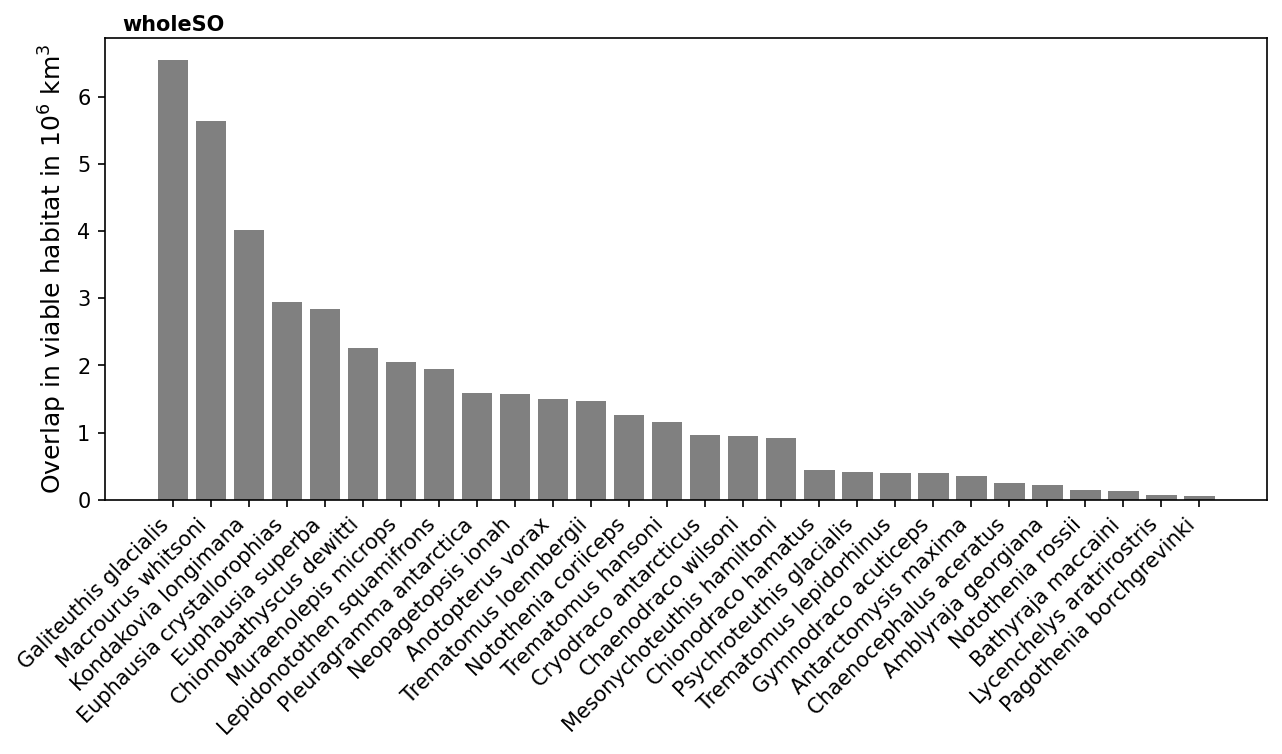

In [11]:
#---
# present-day overlap
#---
    
depth_list1 = [0] #[0,250,750,1500]
depth_list2 = [3500] #[250,750,1500,3500]

save_plots = False
display_plots = True 
plot_eps = False
    
for rr in range(2,3):#0,len(subregions)):
    print(subregions[rr])
    
    dd = 0
    depth1,depth2 = depth_list1[dd],depth_list2[dd] #750,1500 #250,750 #0,250 #1000,2000 #0,3000
    ind_depths = np.where((depths>depth1) & (depths<=depth2))[0]
   # print(species_list2)
   # print(np.nansum(data_hist_b[rr,ind_depths,:],axis=0))
    aux = np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
    
    ind_sort = np.argsort(aux)
    aux = aux[ind_sort]
    species_list3 = species_list2[ind_sort]
   # print(species_list3)
   # print(aux)
    
    fs = 10
    
    
    fig7, ax1 = plt.subplots(num=2, figsize=(10,4), dpi=150, facecolor='w', edgecolor='k')
    plt.bar(np.arange(0,len(species_list3)),aux[::-1],color='grey')
    plt.xticks(np.arange(0,len(species_list3)),species_list3[::-1],fontsize=fs,rotation=45,ha='right')
    
    if subregions[rr] in ['wholeSO']:
        plt.yticks([0,1,2,3,4,5,6],[0,1,2,3,4,5,6],fontsize=fs)
    elif subregions[rr] in ['all_shelves']:
        plt.yticks([0,0.25,0.5,0.75,1],[0,0.25,0.5,0.75,1],fontsize=fs)
    elif subregions[rr] in ['all_openOcean']:
        plt.yticks([0,1,2,3,4,5,6],[0,1,2,3,4,5,6],fontsize=fs)
    else: 
        plt.yticks([0,0.1,0.2,0.3,0.4,0.5],[0,0.1,0.2,0.3,0.4,0.5],fontsize=fs)
    plt.ylabel('Overlap in viable habitat in 10$^{6}$ km$^{3}$',fontsize=fs+2)
    plt.annotate(subregions[rr],xy=(0.015,1.015),\
                xycoords='axes fraction',fontsize=fs,ha='left',color='k',fontweight='bold')
    
    if save_plots:
        dpicnt = 150
        filename = 'Habitat_overlap_PRESENT_DAY'+exp_string+'_ALL_REGION_'+subregions[rr]+'_0_3500m_'+drift_string2+'.png'
        print(filename)
        plt.savefig(savepath1+filename,\
                        dpi = dpicnt, bbox_inches='tight')

    if display_plots:
        plt.show()
    else:
        plt.close(fig7)
        
    if plot_eps:
        fig7, ax1 = plt.subplots(num=2, figsize=(10,4), dpi=150, facecolor='w', edgecolor='k')
        plt.bar(np.arange(0,len(species_list3)),aux[::-1],color='grey')
        plt.xticks(np.arange(0,len(species_list3)),[],fontsize=fs,rotation=45,ha='right')

        if subregions[rr] in ['wholeSO']:
            plt.yticks([0,1,2,3,4,5,6],[],fontsize=fs)
        elif subregions[rr] in ['all_shelves']:
            plt.yticks([0,0.25,0.5,0.75,1],[],fontsize=fs)
        elif subregions[rr] in ['all_openOcean']:
            plt.yticks([0,1,2,3,4,5,6],[],fontsize=fs)
        else: 
            plt.yticks([0,0.1,0.2,0.3,0.4,0.5],[],fontsize=fs)
        
        if save_plots:
            dpicnt = 150
            filename = 'Habitat_overlap_PRESENT_DAY'+exp_string+'_ALL_REGION_'+subregions[rr]+'_0_3500m_'+drift_string2+'.eps'
            print(filename)
            plt.savefig(savepath2+filename,dpi = dpicnt, bbox_inches='tight',format='eps')

        if display_plots:
            plt.show()
        else:
            plt.close(fig7)
    
    

In [12]:
print(data_ssp585_b.shape)

(3, 88, 28)


all_shelves


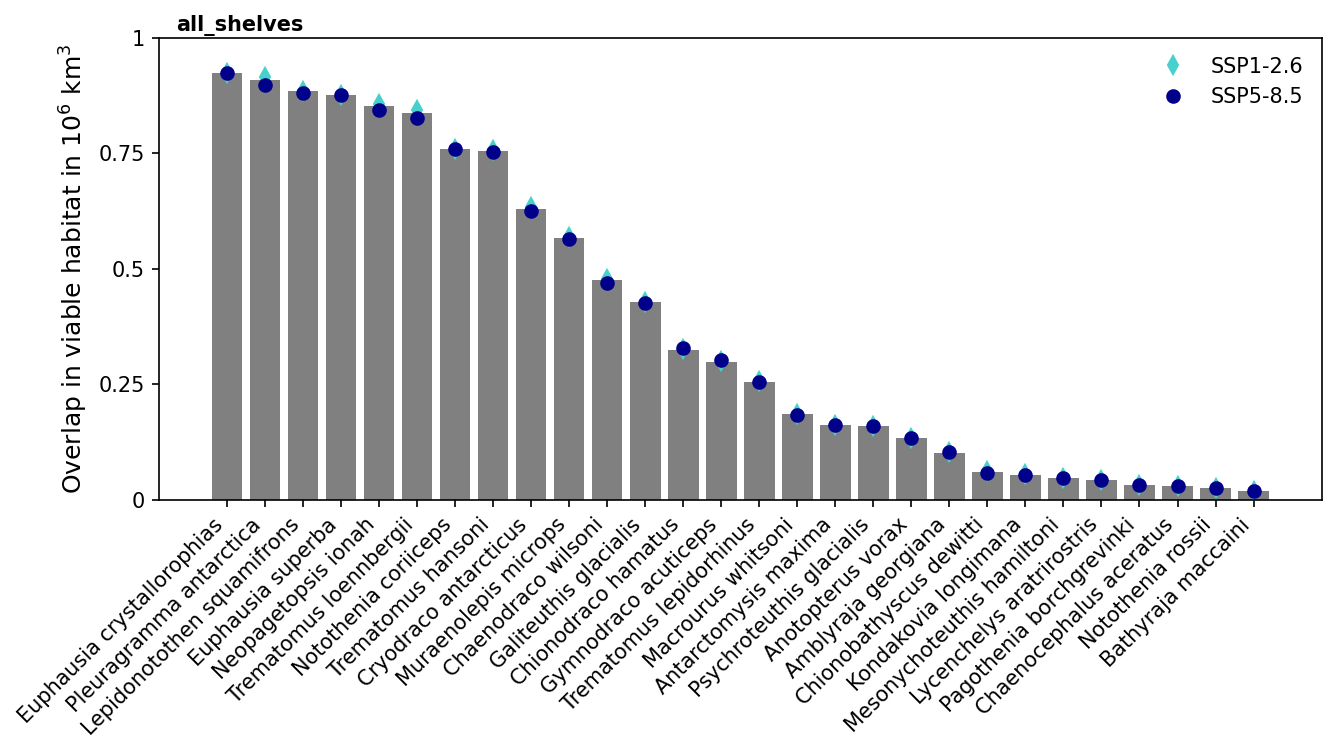

all_openOcean


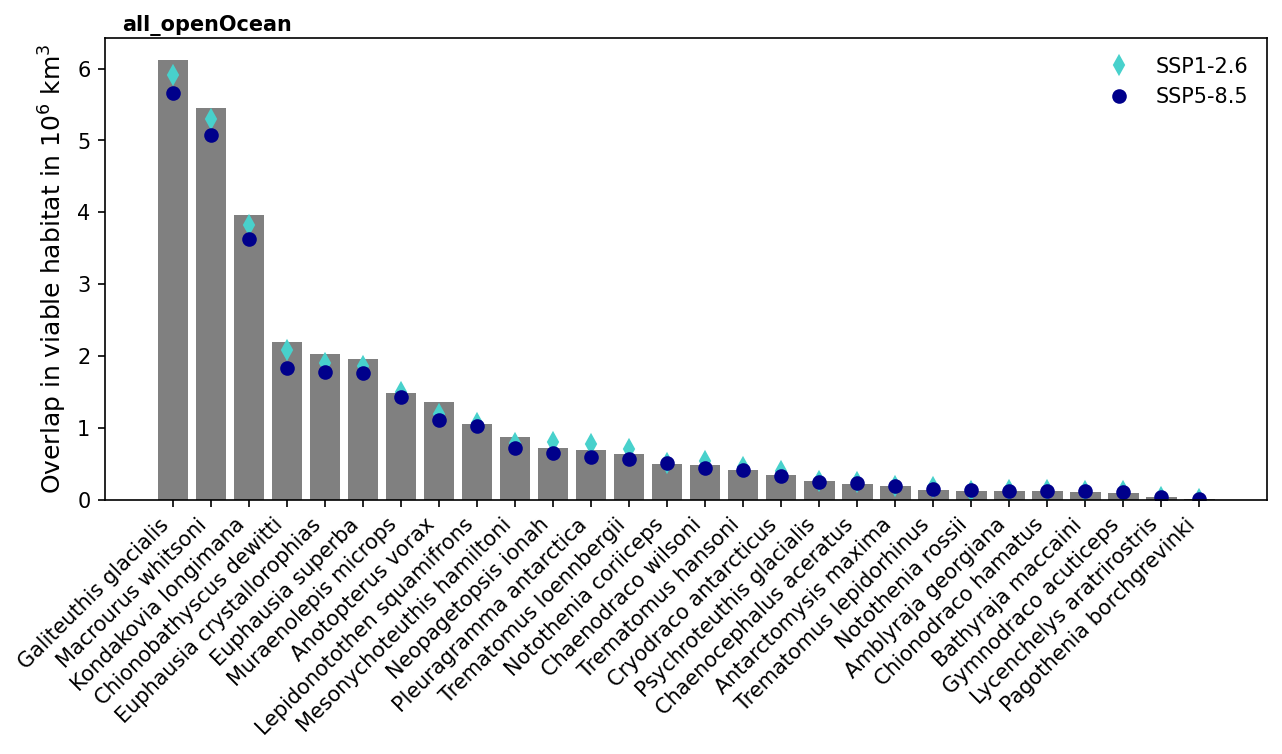

wholeSO


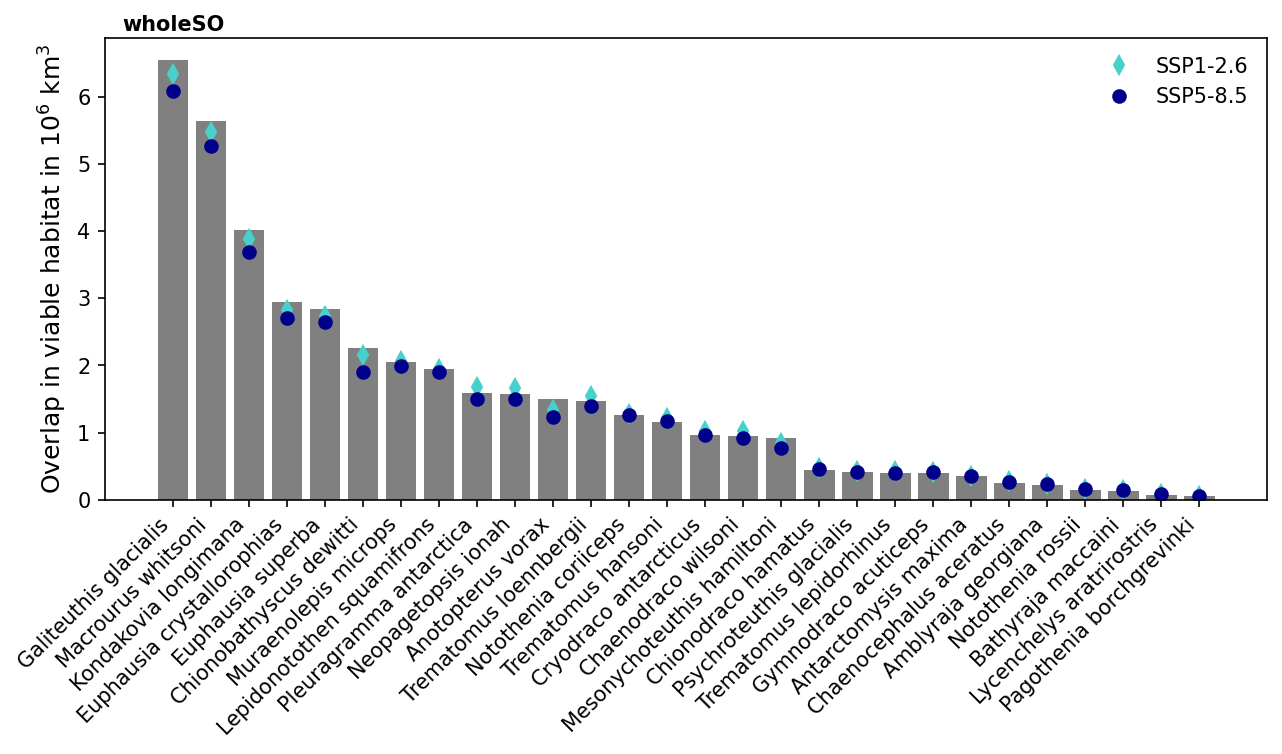

In [13]:
#---
# present-day+future overlap
#---
    
depth_list1 = [0] #[0,250,750,1500]
depth_list2 = [3500] #[250,750,1500,3500]

save_plots = False
display_plots = True 
plot_eps = False
    
for rr in range(0,len(subregions)):
    print(subregions[rr])
    
    dd = 0
    depth1,depth2 = depth_list1[dd],depth_list2[dd] #750,1500 #250,750 #0,250 #1000,2000 #0,3000
    ind_depths = np.where((depths>depth1) & (depths<=depth2))[0]
   # print(species_list2)
   # print(np.nansum(data_hist_b[rr,ind_depths,:],axis=0))
    aux = np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
    aux585 = np.nansum(data_ssp585_b[rr,ind_depths,:],axis=0)
    aux126 = np.nansum(data_ssp126_b[rr,ind_depths,:],axis=0)
    
    ind_sort = np.argsort(aux)
    aux = aux[ind_sort]
    aux585 = aux585[ind_sort]
    aux126 = aux126[ind_sort]
    species_list3 = species_list2[ind_sort]
    
    
   # print(species_list3)
   # print(aux)
    
    fs = 10
    
    
    fig7, ax1 = plt.subplots(num=2, figsize=(10,4), dpi=150, facecolor='w', edgecolor='k')
    plt.bar(np.arange(0,len(species_list3)),aux[::-1],color='grey')
    plt.plot(np.arange(0,len(species_list3)),aux126[::-1],color='mediumturquoise',marker='d',linestyle='None',label='SSP1-2.6')
    plt.plot(np.arange(0,len(species_list3)),aux585[::-1],color='darkblue',marker='o',linestyle='None',label='SSP5-8.5')
    
    plt.xticks(np.arange(0,len(species_list3)),species_list3[::-1],fontsize=fs,rotation=45,ha='right')
    
    plt.legend(frameon=False)
    if subregions[rr] in ['wholeSO']:
        if depth_list1[dd] in [400,700]:
            plt.yticks([0,0.25,0.5,0.75,1],[0,0.25,0.5,0.75,1],fontsize=fs)
        else:
            plt.yticks([0,1,2,3,4,5,6],[0,1,2,3,4,5,6],fontsize=fs)
    elif subregions[rr] in ['all_shelves']:
        plt.yticks([0,0.25,0.5,0.75,1],[0,0.25,0.5,0.75,1],fontsize=fs)
    elif subregions[rr] in ['all_openOcean']:
        if depth_list1[dd] in [400,700]:
            plt.yticks([0,0.25,0.5,0.75,1],[0,0.25,0.5,0.75,1],fontsize=fs)
        else:
            plt.yticks([0,1,2,3,4,5,6],[0,1,2,3,4,5,6],fontsize=fs)
    else: 
        plt.yticks([0,0.1,0.2,0.3,0.4,0.5],[0,0.1,0.2,0.3,0.4,0.5],fontsize=fs)
    plt.ylabel('Overlap in viable habitat in 10$^{6}$ km$^{3}$',fontsize=fs+2)
    plt.annotate(subregions[rr],xy=(0.015,1.015),\
                xycoords='axes fraction',fontsize=fs,ha='left',color='k',fontweight='bold')
    
    if save_plots:
        dpicnt = 150
        filename = 'Habitat_overlap_PRESENT_DAY'+exp_string+'_ALL_REGION_'+subregions[rr]+'_0_3500m_'+drift_string2+'.png'
        print(filename)
        plt.savefig(savepath1+filename,\
                        dpi = dpicnt, bbox_inches='tight')

    if display_plots:
        plt.show()
    else:
        plt.close(fig7)
        
    if plot_eps:
        fig7, ax1 = plt.subplots(num=2, figsize=(10,4), dpi=150, facecolor='w', edgecolor='k')
        plt.bar(np.arange(0,len(species_list3)),aux[::-1],color='grey')
        plt.plot(np.arange(0,len(species_list3)),aux126[::-1],color='mediumturquoise',marker='d',linestyle='None',label='SSP1-2.6')
        plt.plot(np.arange(0,len(species_list3)),aux585[::-1],color='darkblue',marker='o',linestyle='None',label='SSP5-8.5')
    
        plt.xticks(np.arange(0,len(species_list3)),[],fontsize=fs,rotation=45,ha='right')

        if subregions[rr] in ['wholeSO']:
            if depth_list1[dd] in [400,700]:
                plt.yticks([0,0.25,0.5,0.75,1],[],fontsize=fs)
            else:
                plt.yticks([0,1,2,3,4,5,6],[],fontsize=fs)
        elif subregions[rr] in ['all_shelves']:
            plt.yticks([0,0.25,0.5,0.75,1],[],fontsize=fs)
        elif subregions[rr] in ['all_openOcean']:
            if depth_list1[dd] in [400,700]:
                plt.yticks([0,0.25,0.5,0.75,1],[],fontsize=fs)
            else:
                plt.yticks([0,1,2,3,4,5,6],[],fontsize=fs)
        else: 
            plt.yticks([0,0.1,0.2,0.3,0.4,0.5],[],fontsize=fs)
        
        if save_plots:
            dpicnt = 150
            filename = 'Habitat_overlap_PRESENT_DAY_with_FUTURE_'+exp_string+'_ALL_REGION_'+subregions[rr]+'_0_3500m_'+drift_string2+'.eps'
            print(filename)
            plt.savefig(savepath2+filename,dpi = dpicnt, bbox_inches='tight',format='eps')

        if display_plots:
            plt.show()
        else:
            plt.close(fig7)
    
    

In [14]:
#---
# 

all_shelves


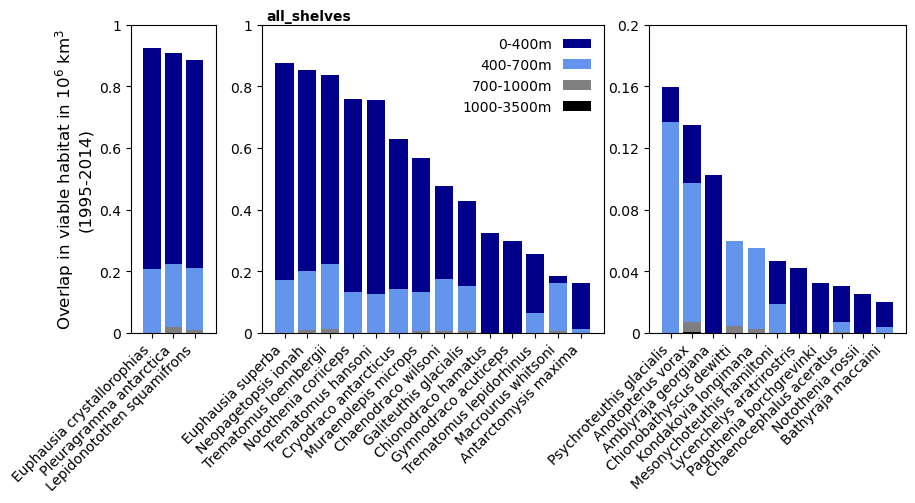

all_openOcean


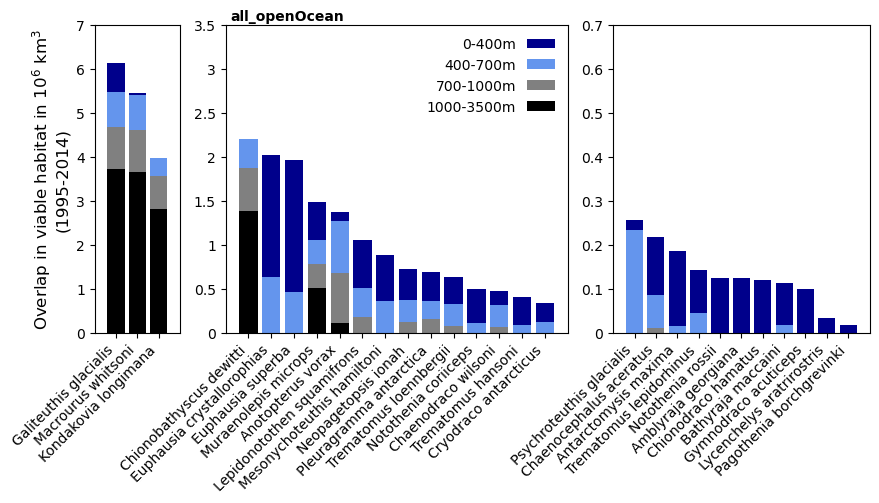

wholeSO


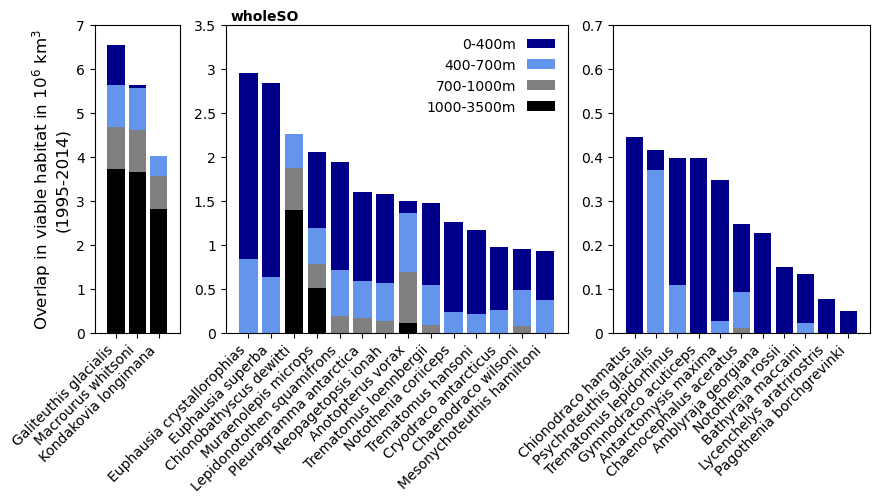

In [15]:
#---
# overlap: different depth levels combined: PRESENT-DAY
#---
    
depth_list1 = [0,400,700,1000] #[0,250,750,1500]
depth_list2 = [400,700,1000,3500] #[250,750,1500,3500]

save_plots = False
display_plots = True 
plot_eps = False
    
for rr in range(0,len(subregions)):
    print(subregions[rr])
    
    dd = 0
    aux = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    for dd in range(0,len(depth_list1)):
        depth1,depth2 = depth_list1[dd],depth_list2[dd] #750,1500 #250,750 #0,250 #1000,2000 #0,3000
        ind_depths = np.where((depths>depth1) & (depths<=depth2))[0]
        aux[:,dd] = np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
    #print(aux.shape)
    
    # whole water column
    depth1,depth2 = 0,3500
    ind_depths = np.where((depths>depth1) & (depths<=depth2))[0]
    aux_full = np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
    aux585_full = np.nansum(data_ssp585_b[rr,ind_depths,:],axis=0)
    aux126_full = np.nansum(data_ssp126_b[rr,ind_depths,:],axis=0)

    ind_sort = np.argsort(aux_full)
    aux_full = aux_full[ind_sort]
    aux585_full = aux585_full[ind_sort]
    aux126_full = aux126_full[ind_sort]
    species_list3 = species_list2[ind_sort]
    
    
    fs = 10
    
    fig7, axs = plt.subplots(1,3,figsize=(10,4), gridspec_kw={'width_ratios': [0.2,0.8,0.6]})

    ax = axs[0]
    ind1,ind2 = 0,3
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,3][::-1][ind1:ind2],color='black',\
            label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,2][::-1][ind1:ind2],color='grey',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2],\
            label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,1][::-1][ind1:ind2],color='cornflowerblue',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2],\
            label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,0][::-1][ind1:ind2],color='darkblue',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2]+aux[ind_sort,1][::-1][ind1:ind2],\
            label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
   # ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux126_full[::-1][ind1:ind2],\
   #         color='firebrick',marker='d',linestyle='None')#,label='SSP1-2.6')
   # ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux585_full[::-1][ind1:ind2],\
   #         color='firebrick',marker='o',linestyle='None')#,label='SSP5-8.5')
    ax.set_xticks(np.arange(0,len(np.arange(ind1,ind2))))
    ax.set_xticklabels(species_list3[::-1][ind1:ind2]) 
    ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-1,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
    if subregions[rr] in ['wholeSO','all_openOcean']:
        ax.set_ylim((0,7))
        ax.set_yticks([0,1,2,3,4,5,6,7])
        ax.set_yticklabels([0,1,2,3,4,5,6,7]) 
    elif subregions[rr] in ['all_shelves']:
        ax.set_ylim((0,1))
        ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
        ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1]) 
    for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fs) 
        tick.set_rotation(45) 
        tick.set_ha('right') 
    ax.set_ylabel('Overlap in viable habitat in 10$^{6}$ km$^{3}$\n(1995-2014)',fontsize=fs+2)
    
    ax = axs[1]
    ind1,ind2 = 3,17
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,3][::-1][ind1:ind2],color='black',\
            label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,2][::-1][ind1:ind2],color='grey',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2],\
            label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,1][::-1][ind1:ind2],color='cornflowerblue',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2],\
            label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,0][::-1][ind1:ind2],color='darkblue',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2]+aux[ind_sort,1][::-1][ind1:ind2],\
            label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
    #ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux126_full[::-1][ind1:ind2],\
    #        color='firebrick',marker='d',linestyle='None')#,label='SSP1-2.6')
    #ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux585_full[::-1][ind1:ind2],\
    #        color='firebrick',marker='o',linestyle='None')#,label='SSP5-8.5')
    ax.set_xticks(np.arange(0,len(np.arange(ind1,ind2))))
    ax.set_xticklabels(species_list3[::-1][ind1:ind2]) 
    handles, labels = ax.get_legend_handles_labels() 
    order = [3,2,1,0] ##specify order of items in legend
    ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
                    bbox_to_anchor=(1, 1),fancybox=True, frameon=False,markerfirst=False,\
              shadow=False,prop={'size': 10})
    #ax.legend(markerfirst=False,frameon=False)
    ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-1,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
    if subregions[rr] in ['wholeSO','all_openOcean']:
        ax.set_ylim((0,3.5))
        ax.set_yticks([0,0.5,1,1.5,2,2.5,3,3.5])
        ax.set_yticklabels([0,0.5,1,1.5,2,2.5,3,3.5]) 
    elif subregions[rr] in ['all_shelves']:
        ax.set_ylim((0,1))
        ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
        ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1]) 
    for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fs) 
        tick.set_rotation(45) 
        tick.set_ha('right') 
    ax.annotate(subregions[rr],xy=(0.015,1.015),\
                xycoords='axes fraction',fontsize=fs,ha='left',color='k',fontweight='bold')
    
    ax = axs[2]
    ind1,ind2 = 17,len(species_list3)
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,3][::-1][ind1:ind2],color='black',\
            label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,2][::-1][ind1:ind2],color='grey',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2],\
            label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,1][::-1][ind1:ind2],color='cornflowerblue',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2],\
            label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,0][::-1][ind1:ind2],color='darkblue',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2]+aux[ind_sort,1][::-1][ind1:ind2],\
            label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
   # ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux126_full[::-1][ind1:ind2],\
   #         color='firebrick',marker='d',linestyle='None')#,label='SSP1-2.6')
   # ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux585_full[::-1][ind1:ind2],\
   #         color='firebrick',marker='o',linestyle='None')#,label='SSP5-8.5')
    ax.set_xticks(np.arange(0,len(np.arange(ind1,ind2))))
    ax.set_xticklabels(species_list3[::-1][ind1:ind2])
    ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-1,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
    if subregions[rr] in ['wholeSO','all_openOcean']:
        ff = 5.0
        ax.set_ylim((0,3.5/ff))
        ax.set_yticks([0,0.5/ff,1/ff,1.5/ff,2/ff,2.5/ff,3/ff,3.5/ff])
        ax.set_yticklabels([0,0.5/ff,1/ff,1.5/ff,2/ff,2.5/ff,3/ff,3.5/ff]) 
    elif subregions[rr] in ['all_shelves']:
        ff = 5.0
        ax.set_ylim((0,1/ff))
        ax.set_yticks([0,0.2/ff,0.4/ff,0.6/ff,0.8/ff,1/ff])
        ax.set_yticklabels([0,0.2/ff,0.4/ff,0.6/ff,0.8/ff,1/ff]) 
    for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fs) 
        tick.set_rotation(45) 
        tick.set_ha('right') 
    
    if save_plots:
        dpicnt = 150
        filename = 'Habitat_overlap_PRESENT_DAY'+exp_string+'_ALL_REGION_'+subregions[rr]+'_ALL_DEPTH_LEVELS_'+drift_string2+'.png'
        print(filename)
        plt.savefig(savepath1+filename,\
                        dpi = dpicnt, bbox_inches='tight')

    if display_plots:
        plt.show()
    else:
        plt.close(fig7)
        
        
    if plot_eps:
        
        fig7, axs = plt.subplots(1,3,figsize=(10,4), gridspec_kw={'width_ratios': [0.2,0.8,0.6]})

        ax = axs[0]
        ind1,ind2 = 0,3
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,3][::-1][ind1:ind2],color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,2][::-1][ind1:ind2],color='grey',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,1][::-1][ind1:ind2],color='cornflowerblue',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,0][::-1][ind1:ind2],color='darkblue',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2]+aux[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
       # ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux126_full[::-1][ind1:ind2],\
       #         color='firebrick',marker='d',linestyle='None')#,label='SSP1-2.6')
       # ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux585_full[::-1][ind1:ind2],\
       #         color='firebrick',marker='o',linestyle='None')#,label='SSP5-8.5')
        ax.set_xticks(np.arange(0,len(np.arange(ind1,ind2))))
        ax.set_xticklabels([]) 
        ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-1,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
        if subregions[rr] in ['wholeSO','all_openOcean']:
            ax.set_ylim((0,7))
            ax.set_yticks([0,1,2,3,4,5,6,7])
            ax.set_yticklabels([]) 
        elif subregions[rr] in ['all_shelves']:
            ax.set_ylim((0,1))
            ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
            ax.set_yticklabels([]) 
        for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fs) 
            tick.set_rotation(45) 
            tick.set_ha('right') 
        
        ax = axs[1]
        ind1,ind2 = 3,17
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,3][::-1][ind1:ind2],color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,2][::-1][ind1:ind2],color='grey',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,1][::-1][ind1:ind2],color='cornflowerblue',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,0][::-1][ind1:ind2],color='darkblue',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2]+aux[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
        #ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux126_full[::-1][ind1:ind2],\
        #        color='firebrick',marker='d',linestyle='None')#,label='SSP1-2.6')
        #ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux585_full[::-1][ind1:ind2],\
        #        color='firebrick',marker='o',linestyle='None')#,label='SSP5-8.5')
        ax.set_xticks(np.arange(0,len(np.arange(ind1,ind2))))
        ax.set_xticklabels([]) 
        handles, labels = ax.get_legend_handles_labels() 
        order = [3,2,1,0] ##specify order of items in legend
        ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
                        bbox_to_anchor=(1, 1),fancybox=True, frameon=False,markerfirst=False,\
                  shadow=False,prop={'size': 10})
        #ax.legend(markerfirst=False,frameon=False)
        ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-1,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
        if subregions[rr] in ['wholeSO','all_openOcean']:
            ax.set_ylim((0,3.5))
            ax.set_yticks([0,0.5,1,1.5,2,2.5,3,3.5])
            ax.set_yticklabels([]) 
        elif subregions[rr] in ['all_shelves']:
            ax.set_ylim((0,1))
            ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
            ax.set_yticklabels([]) 
        for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fs) 
            tick.set_rotation(45) 
            tick.set_ha('right') 
        
        ax = axs[2]
        ind1,ind2 = 17,len(species_list3)
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,3][::-1][ind1:ind2],color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,2][::-1][ind1:ind2],color='grey',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,1][::-1][ind1:ind2],color='cornflowerblue',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,0][::-1][ind1:ind2],color='darkblue',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2]+aux[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
       # ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux126_full[::-1][ind1:ind2],\
       #         color='firebrick',marker='d',linestyle='None')#,label='SSP1-2.6')
       # ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux585_full[::-1][ind1:ind2],\
       #         color='firebrick',marker='o',linestyle='None')#,label='SSP5-8.5')
        ax.set_xticks(np.arange(0,len(np.arange(ind1,ind2))))
        ax.set_xticklabels([])
        ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-1,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
        if subregions[rr] in ['wholeSO','all_openOcean']:
            ff = 5.0
            ax.set_ylim((0,3.5/ff))
            ax.set_yticks([0,0.5/ff,1/ff,1.5/ff,2/ff,2.5/ff,3/ff,3.5/ff])
            ax.set_yticklabels([]) 
        elif subregions[rr] in ['all_shelves']:
            ff = 5.0
            ax.set_ylim((0,1/ff))
            ax.set_yticks([0,0.2/ff,0.4/ff,0.6/ff,0.8/ff,1/ff])
            ax.set_yticklabels([]) 
        for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fs) 
            tick.set_rotation(45) 
            tick.set_ha('right') 

        if save_plots:
            dpicnt = 150
            filename = 'Habitat_overlap_PRESENT_DAY'+exp_string+'_ALL_REGION_'+subregions[rr]+'_ALL_DEPTH_LEVELS_'+drift_string2+'.eps'
            print(filename)
            plt.savefig(savepath2+filename,\
                            dpi = dpicnt, bbox_inches='tight',format='eps')

        if display_plots:
            plt.show()
        else:
            plt.close(fig7)

    

In [16]:
print(subregions)

['all_shelves', 'all_openOcean', 'wholeSO']


In [17]:
#---
# overlap: different depth levels combined: FUTURE
#---
    
depth_list1 = [0,400,700,1000] #[0,250,750,1500]
depth_list2 = [400,700,1000,3500] #[250,750,1500,3500]

save_plots = False
display_plots = False 
plot_eps = False
    
for rr in range(0,len(subregions)):
    print(subregions[rr])
    
    dd = 0
    aux = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    aux1 = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    aux2 = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    aux3 = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    aux4 = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    for dd in range(0,len(depth_list1)):
        depth1,depth2 = depth_list1[dd],depth_list2[dd] #750,1500 #250,750 #0,250 #1000,2000 #0,3000
        ind_depths = np.where((depths>depth1) & (depths<=depth2))[0]
        aux[:,dd] = np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
        aux1[:,dd] = np.nansum(data_ssp126_b[rr,ind_depths,:],axis=0)
        aux2[:,dd] = np.nansum(data_ssp245_b[rr,ind_depths,:],axis=0)
        aux3[:,dd] = np.nansum(data_ssp370_b[rr,ind_depths,:],axis=0)
        aux4[:,dd] = np.nansum(data_ssp585_b[rr,ind_depths,:],axis=0)
    #print(aux.shape)
    
    # whole water column
    depth1,depth2 = 0,3500
    ind_depths = np.where((depths>depth1) & (depths<=depth2))[0]
    aux_full = np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
    aux585_full = np.nansum(data_ssp585_b[rr,ind_depths,:],axis=0)
    aux370_full = np.nansum(data_ssp370_b[rr,ind_depths,:],axis=0)
    aux245_full = np.nansum(data_ssp245_b[rr,ind_depths,:],axis=0)
    aux126_full = np.nansum(data_ssp126_b[rr,ind_depths,:],axis=0)

    ind_sort = np.argsort(aux_full)
    aux_full = aux_full[ind_sort]
    aux585_full = aux585_full[ind_sort]
    aux370_full = aux370_full[ind_sort]
    aux245_full = aux245_full[ind_sort]
    aux126_full = aux126_full[ind_sort]
    species_list3 = species_list2[ind_sort]
    
    fs = 10
    marker1 = 'o'
    ms = 5
    
    sim_list = ['ssp585','ssp370','ssp245','ssp126']
    
    for ss in range(0,len(sim_list)):
        print('Plot',sim_list[ss],'...')
        
        if sim_list[ss] in ['ssp126']:
            aux_plot = np.copy(aux1)
        elif sim_list[ss] in ['ssp245']:
            aux_plot = np.copy(aux2)
        elif sim_list[ss] in ['ssp370']:
            aux_plot = np.copy(aux3)
        elif sim_list[ss] in ['ssp585']:
            aux_plot = np.copy(aux4)
    
        
        fig7, axs = plt.subplots(1,3,figsize=(10,4), gridspec_kw={'width_ratios': [0.2,0.8,0.6]})

        ax = axs[0]
        ind1,ind2 = 0,3
        print(aux_plot[ind_sort,1][::-1][ind1:ind2][0])
        
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],color='grey',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],color='cornflowerblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],color='darkblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
        
        # plot historical
        ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux_full[::-1][ind1:ind2],\
                color='darkorange',marker=marker1,markersize=ms,linestyle='None')

        ax.set_xticks(np.arange(0,len(np.arange(ind1,ind2))))
        ax.set_xticklabels(species_list3[::-1][ind1:ind2]) 
        ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-1,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
        if subregions[rr] in ['wholeSO','all_openOcean']:
            ax.set_ylim((0,7))
            ax.set_yticks([0,1,2,3,4,5,6,7])
            ax.set_yticklabels([0,1,2,3,4,5,6,7]) 
        elif subregions[rr] in ['all_shelves']:
            ax.set_ylim((0,1))
            ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
            ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1]) 
        for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fs) 
            tick.set_rotation(45) 
            tick.set_ha('right') 
        ax.set_ylabel('Overlap in viable habitat in 10$^{6}$ km$^{3}$\n(1995-2014)',fontsize=fs+2)

        ax = axs[1]
        ind1,ind2 = 3,17
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],color='grey',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],color='cornflowerblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],color='darkblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
        
        # plot historical
        ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux_full[::-1][ind1:ind2],\
                color='darkorange',marker=marker1,markersize=ms,linestyle='None',label='total overlap 1995-2014')
        
        ax.set_xticks(np.arange(0,len(np.arange(ind1,ind2))))
        ax.set_xticklabels(species_list3[::-1][ind1:ind2]) 
        handles, labels = ax.get_legend_handles_labels() 
        order = [4,3,2,1,0] ##specify order of items in legend
        ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
                        bbox_to_anchor=(1, 1),fancybox=True, frameon=False,markerfirst=False,\
                  shadow=False,prop={'size': 10})
        #ax.legend(markerfirst=False,frameon=False)
        ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-1,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
        if subregions[rr] in ['wholeSO','all_openOcean']:
            ax.set_ylim((0,3.5))
            ax.set_yticks([0,0.5,1,1.5,2,2.5,3,3.5])
            ax.set_yticklabels([0,0.5,1,1.5,2,2.5,3,3.5]) 
        elif subregions[rr] in ['all_shelves']:
            ax.set_ylim((0,1))
            ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
            ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1]) 
        for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fs) 
            tick.set_rotation(45) 
            tick.set_ha('right') 
        ax.annotate(subregions[rr]+', '+sim_list[ss],xy=(0.015,1.015),\
                    xycoords='axes fraction',fontsize=fs,ha='left',color='k',fontweight='bold')

        ax = axs[2]
        ind1,ind2 = 17,len(species_list3)
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],color='grey',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],color='cornflowerblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],color='darkblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
        
        # plot historical
        ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux_full[::-1][ind1:ind2],\
                color='darkorange',marker=marker1,markersize=ms,linestyle='None')
        
        ax.set_xticks(np.arange(0,len(np.arange(ind1,ind2))))
        ax.set_xticklabels(species_list3[::-1][ind1:ind2])
        ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-1,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
        if subregions[rr] in ['wholeSO','all_openOcean']:
            ff = 5.0
            ax.set_ylim((0,3.5/ff))
            ax.set_yticks([0,0.5/ff,1/ff,1.5/ff,2/ff,2.5/ff,3/ff,3.5/ff])
            ax.set_yticklabels([0,0.5/ff,1/ff,1.5/ff,2/ff,2.5/ff,3/ff,3.5/ff]) 
        elif subregions[rr] in ['all_shelves']:
            ff = 5.0
            ax.set_ylim((0,1/ff))
            ax.set_yticks([0,0.2/ff,0.4/ff,0.6/ff,0.8/ff,1/ff])
            ax.set_yticklabels([0,0.2/ff,0.4/ff,0.6/ff,0.8/ff,1/ff]) 
        for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fs) 
            tick.set_rotation(45) 
            tick.set_ha('right') 

        if save_plots:
            dpicnt = 150
            filename = 'Habitat_overlap_FUTURE'+exp_string+'_'+sim_list[ss]+'_ALL_REGION_'+subregions[rr]+'_ALL_DEPTH_LEVELS_'+drift_string2+'.png'
            print(filename)
            plt.savefig(savepath1+filename,\
                            dpi = dpicnt, bbox_inches='tight')

        if display_plots:
            plt.show()
        else:
            plt.close(fig7)


        if plot_eps:

            fig7, axs = plt.subplots(1,3,figsize=(10,4), gridspec_kw={'width_ratios': [0.2,0.8,0.6]})

            ax = axs[0]
            ind1,ind2 = 0,3
            ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
            ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],color='grey',\
                    bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
                    label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
            ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],color='cornflowerblue',\
                    bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
                    label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
            ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],color='darkblue',\
                    bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
                    label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')

            # plot historical
            ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux_full[::-1][ind1:ind2],\
                    color='darkorange',marker=marker1,markersize=ms,linestyle='None')
        
            ax.set_xticks(np.arange(0,len(np.arange(ind1,ind2))))
            ax.set_xticklabels([]) 
            ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-1,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
            if subregions[rr] in ['wholeSO','all_openOcean']:
                ax.set_ylim((0,7))
                ax.set_yticks([0,1,2,3,4,5,6,7])
                ax.set_yticklabels([]) 
            elif subregions[rr] in ['all_shelves']:
                ax.set_ylim((0,1))
                ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
                ax.set_yticklabels([]) 
            for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
                tick.set_fontsize(fs) 
                tick.set_rotation(45) 
                tick.set_ha('right') 

            ax = axs[1]
            ind1,ind2 = 3,17
            ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
            ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],color='grey',\
                    bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
                    label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
            ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],color='cornflowerblue',\
                    bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
                    label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
            ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],color='darkblue',\
                    bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
                    label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')

            # plot historical
            ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux_full[::-1][ind1:ind2],\
                    color='darkorange',marker=marker1,markersize=ms,linestyle='None',label='total overlap 1995-2014')
            
            ax.set_xticks(np.arange(0,len(np.arange(ind1,ind2))))
            ax.set_xticklabels([]) 
            handles, labels = ax.get_legend_handles_labels() 
            order = [4,3,2,1,0] ##specify order of items in legend
            ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
                            bbox_to_anchor=(1, 1),fancybox=True, frameon=False,markerfirst=False,\
                      shadow=False,prop={'size': 10})
            #ax.legend(markerfirst=False,frameon=False)
            ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-1,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
            if subregions[rr] in ['wholeSO','all_openOcean']:
                ax.set_ylim((0,3.5))
                ax.set_yticks([0,0.5,1,1.5,2,2.5,3,3.5])
                ax.set_yticklabels([]) 
            elif subregions[rr] in ['all_shelves']:
                ax.set_ylim((0,1))
                ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
                ax.set_yticklabels([]) 
            for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
                tick.set_fontsize(fs) 
                tick.set_rotation(45) 
                tick.set_ha('right') 

            ax = axs[2]
            ind1,ind2 = 17,len(species_list3)
            ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
            ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],color='grey',\
                    bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
                    label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
            ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],color='cornflowerblue',\
                    bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
                    label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
            ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],color='darkblue',\
                    bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
                    label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')

            # plot historical
            ax.plot(np.arange(0,len(np.arange(ind1,ind2))),aux_full[::-1][ind1:ind2],\
                    color='darkorange',marker=marker1,markersize=ms,linestyle='None')
            
            ax.set_xticks(np.arange(0,len(np.arange(ind1,ind2))))
            ax.set_xticklabels([])
            ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-1,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
            if subregions[rr] in ['wholeSO','all_openOcean']:
                ff = 5.0
                ax.set_ylim((0,3.5/ff))
                ax.set_yticks([0,0.5/ff,1/ff,1.5/ff,2/ff,2.5/ff,3/ff,3.5/ff])
                ax.set_yticklabels([]) 
            elif subregions[rr] in ['all_shelves']:
                ff = 5.0
                ax.set_ylim((0,1/ff))
                ax.set_yticks([0,0.2/ff,0.4/ff,0.6/ff,0.8/ff,1/ff])
                ax.set_yticklabels([]) 
            for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
                tick.set_fontsize(fs) 
                tick.set_rotation(45) 
                tick.set_ha('right') 

            if save_plots:
                dpicnt = 150
                filename = 'Habitat_overlap_FUTURE'+exp_string+'_'+sim_list[ss]+'_ALL_REGION_'+subregions[rr]+'_ALL_DEPTH_LEVELS_'+drift_string2+'.eps'
                print(filename)
                plt.savefig(savepath2+filename,\
                                dpi = dpicnt, bbox_inches='tight',format='eps')

            if display_plots:
                plt.show()
            else:
                plt.close(fig7)

    

all_shelves
Plot ssp585 ...
0.20601232582703233
Plot ssp370 ...
0.20715727796778083
Plot ssp245 ...
0.20689624780789018
Plot ssp126 ...
0.20718855690211058
all_openOcean
Plot ssp585 ...
0.6214741691946983
Plot ssp370 ...
0.6716232374310493
Plot ssp245 ...
0.6950510069727898
Plot ssp126 ...
0.7313008606433868
wholeSO
Plot ssp585 ...
0.7691927216947079
Plot ssp370 ...
0.8205317780375481
Plot ssp245 ...
0.8437179885804653
Plot ssp126 ...
0.8802833408117294


wholeSO
historical, abs change ssp585, rel change ssp585:
Galiteuthis glacialis 6.55 -0.46 -7.0
Macrourus whitsoni 5.63 -0.37 -6.6
Kondakovia longimana 4.02 -0.33 -8.2
Euphausia crystallorophias 2.95 -0.24 -8.3
Euphausia superba 2.84 -0.19 -6.8
Chionobathyscus dewitti 2.26 -0.36 -16.0
Muraenolepis microps 2.05 -0.06 -2.7
Lepidonotothen squamifrons 1.94 -0.04 -1.9
Pleuragramma antarctica 1.6 -0.1 -6.2
Neopagetopsis ionah 1.57 -0.08 -4.8
Anotopterus vorax 1.5 -0.26 -17.5
Trematomus loennbergii 1.48 -0.09 -5.8
Notothenia coriiceps 1.26 0.01 0.6
Trematomus hansoni 1.16 0.01 0.8
Cryodraco antarcticus 0.97 -0.01 -1.4
Chaenodraco wilsoni 0.95 -0.04 -3.7
Mesonychoteuthis hamiltoni 0.93 -0.16 -17.4
Chionodraco hamatus 0.45 0.01 2.5
Psychroteuthis glacialis 0.42 -0.01 -1.5
Trematomus lepidorhinus 0.4 0.01 1.7
Gymnodraco acuticeps 0.4 0.02 4.1
Antarctomysis maxima 0.35 0.01 1.9
Chaenocephalus aceratus 0.25 0.01 4.8
Amblyraja georgiana 0.23 0.01 2.3
Notothenia rossii 0.15 0.01 3.6
Bathyraja maccai

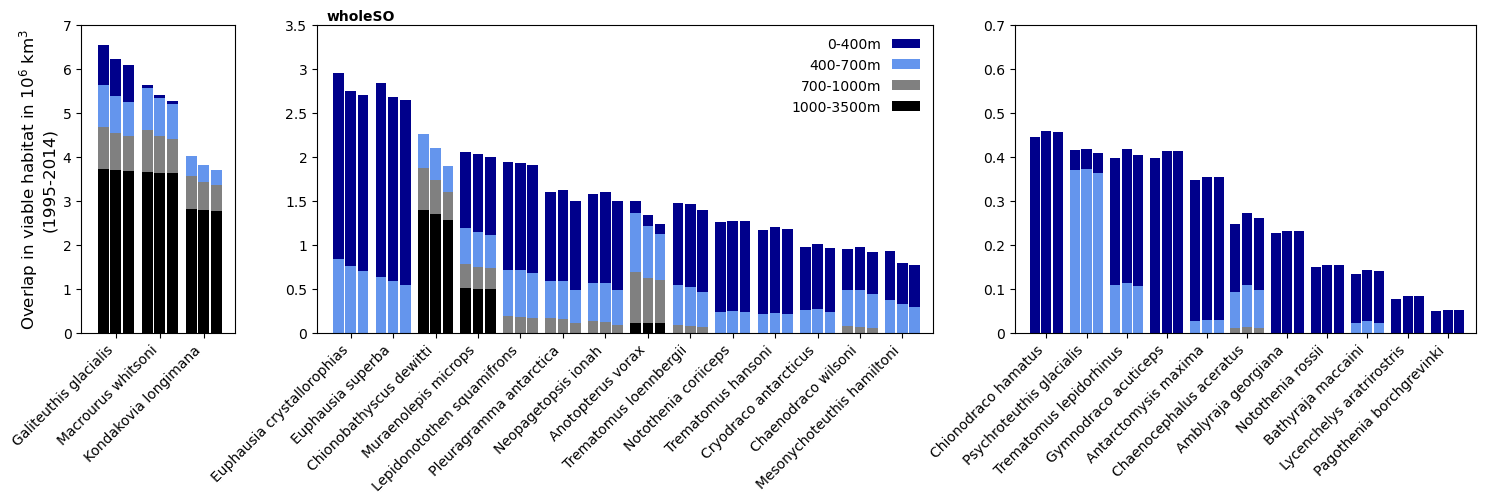

In [18]:
#---
# overlap: different depth levels combined: PRESENT-DAY & FUTURE COMBINED
#---
    
depth_list1 = [0,400,700,1000] #[0,250,750,1500]
depth_list2 = [400,700,1000,3500] #[250,750,1500,3500]

save_plots = False
display_plots = True 
plot_eps = False
    
for rr in range(2,3):#0,len(subregions)):
    print(subregions[rr])
    
    dd = 0
    aux = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    aux1 = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    aux2 = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    aux3 = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    aux4 = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    for dd in range(0,len(depth_list1)):
        depth1,depth2 = depth_list1[dd],depth_list2[dd] #750,1500 #250,750 #0,250 #1000,2000 #0,3000
        ind_depths = np.where((depths>depth1) & (depths<=depth2))[0]
        aux[:,dd] = np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
        aux1[:,dd] = np.nansum(data_ssp126_b[rr,ind_depths,:],axis=0)
        aux2[:,dd] = np.nansum(data_ssp245_b[rr,ind_depths,:],axis=0)
        aux3[:,dd] = np.nansum(data_ssp370_b[rr,ind_depths,:],axis=0)
        aux4[:,dd] = np.nansum(data_ssp585_b[rr,ind_depths,:],axis=0)
    
    # whole water column
    depth1,depth2 = 0,3500
    ind_depths = np.where((depths>depth1) & (depths<=depth2))[0]
    aux_full = np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
    aux585_full = np.nansum(data_ssp585_b[rr,ind_depths,:],axis=0)
    aux126_full = np.nansum(data_ssp126_b[rr,ind_depths,:],axis=0)
    aux245_full = np.nansum(data_ssp245_b[rr,ind_depths,:],axis=0)

    ind_sort = np.argsort(aux_full)
    aux_full = aux_full[ind_sort]
    aux585_full = aux585_full[ind_sort]
    aux245_full = aux245_full[ind_sort]
    aux126_full = aux126_full[ind_sort]
    species_list3 = species_list2[ind_sort]
    
    
    fs = 10
    width1 = 0.25
    shift = 0.29
    
    #---
    # print some numbers
    #---
    print_numbers = True
    if print_numbers:
        print('historical, abs change ssp585, rel change ssp585:')
        ff0 = 100
        ff1 = 10
        aux_plot = np.copy(aux4) # ssp585
        ind1,ind2 = 0,3
        for ii in range(ind1,ind2):
            diff_ssp585 = np.sum(aux_plot[ind_sort,:],axis=1)[::-1][ii]-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            print(species_list3[::-1][ii],np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0,\
                  np.round(ff0*diff_ssp585)/ff0,\
                 np.round(ff1*100*(diff_ssp585)/np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff1)
        ind1,ind2 = 3,17
        for ii in range(ind1,ind2):
            diff_ssp585 = np.sum(aux_plot[ind_sort,:],axis=1)[::-1][ii]-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            print(species_list3[::-1][ii],np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0,\
                 np.round(ff0*diff_ssp585)/ff0,\
                 np.round(ff1*100*(diff_ssp585)/np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff1)
        ind1,ind2 = 17,len(species_list3)
        for ii in range(ind1,ind2):
            diff_ssp585 = np.sum(aux_plot[ind_sort,:],axis=1)[::-1][ii]-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            print(species_list3[::-1][ii],np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0,\
                 np.round(ff0*diff_ssp585)/ff0,\
                 np.round(ff1*100*(diff_ssp585)/np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff1)
        print()
        print('historical, % of viable toothfish habitat')
        habitat_tf = 8.28328 # Mio km3 (from another script)
        aux_plot = np.copy(aux4) # ssp585
        ind1,ind2 = 0,3
        for ii in range(ind1,ind2):
            diff_ssp585 = np.sum(aux_plot[ind_sort,:],axis=1)[::-1][ii]-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            print(species_list3[::-1][ii],100*np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0/habitat_tf)
        ind1,ind2 = 3,17
        for ii in range(ind1,ind2):
            diff_ssp585 = np.sum(aux_plot[ind_sort,:],axis=1)[::-1][ii]-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            print(species_list3[::-1][ii],100*np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0/habitat_tf)
        ind1,ind2 = 17,len(species_list3)
        for ii in range(ind1,ind2):
            diff_ssp585 = np.sum(aux_plot[ind_sort,:],axis=1)[::-1][ii]-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            print(species_list3[::-1][ii],100*np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0/habitat_tf)

    fig7, axs = plt.subplots(1,3,figsize=(18,4), gridspec_kw={'width_ratios': [0.2,0.8,0.6]})

    ax = axs[0]
    ind1,ind2 = 0,3
    # present-day
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
            label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2],\
            label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2],\
            label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2]+aux[ind_sort,1][::-1][ind1:ind2],\
            label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
    # ssp245
    aux_plot = np.copy(aux2)
    ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
            label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
    ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
            label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
    ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
            label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
    ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
            label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
    # ssp585
    aux_plot = np.copy(aux4)
    ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
            label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
    ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
            label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
    ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
            label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
    ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
            label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')

    ax.set_xticks(np.arange(shift,len(np.arange(ind1,ind2))))
    ax.set_xticklabels(species_list3[::-1][ind1:ind2]) 
    ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-0.5,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
    if subregions[rr] in ['wholeSO','all_openOcean']:
        ax.set_ylim((0,7))
        ax.set_yticks([0,1,2,3,4,5,6,7])
        ax.set_yticklabels([0,1,2,3,4,5,6,7]) 
    elif subregions[rr] in ['all_shelves']:
        ax.set_ylim((0,1))
        ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
        ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1]) 
    for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fs) 
        tick.set_rotation(45) 
        tick.set_ha('right') 
    ax.set_ylabel('Overlap in viable habitat in 10$^{6}$ km$^{3}$\n(1995-2014)',fontsize=fs+2)
    
    ax = axs[1]
    ind1,ind2 = 3,17
    # present-day
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
            label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2],\
            label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2],\
            label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2]+aux[ind_sort,1][::-1][ind1:ind2],\
            label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
    # ssp245
    aux_plot = np.copy(aux2)
    ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
            label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
    ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
            label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
    ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
            label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
    ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
            label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
    # ssp585
    aux_plot = np.copy(aux4)
    ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
            label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
    ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
            label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
    ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
            label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
    ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
            label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
    ax.set_xticks(np.arange(shift,len(np.arange(ind1,ind2))))
    ax.set_xticklabels(species_list3[::-1][ind1:ind2]) 
    handles, labels = ax.get_legend_handles_labels() 
    order = [3,2,1,0] ##specify order of items in legend
    ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
                    bbox_to_anchor=(1, 1),fancybox=True, frameon=False,markerfirst=False,\
              shadow=False,prop={'size': 10})
    #ax.legend(markerfirst=False,frameon=False)
    ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-0.5,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
    if subregions[rr] in ['wholeSO','all_openOcean']:
        ax.set_ylim((0,3.5))
        ax.set_yticks([0,0.5,1,1.5,2,2.5,3,3.5])
        ax.set_yticklabels([0,0.5,1,1.5,2,2.5,3,3.5]) 
    elif subregions[rr] in ['all_shelves']:
        ax.set_ylim((0,1))
        ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
        ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1]) 
    for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fs) 
        tick.set_rotation(45) 
        tick.set_ha('right') 
    ax.annotate(subregions[rr],xy=(0.015,1.015),\
                xycoords='axes fraction',fontsize=fs,ha='left',color='k',fontweight='bold')
    
    ax = axs[2]
    ind1,ind2 = 17,len(species_list3)
    # present-day
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
            label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2],\
            label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2],\
            label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
    ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
            bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2]+aux[ind_sort,1][::-1][ind1:ind2],\
            label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
    # ssp245
    aux_plot = np.copy(aux2)
    ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
            label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
    ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
            label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
    ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
            label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
    ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
            label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
    # ssp585
    aux_plot = np.copy(aux4)
    ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
            label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
    ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
            label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
    ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
            label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
    ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
            bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
            label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
    ax.set_xticks(np.arange(shift,len(np.arange(ind1,ind2))))
    ax.set_xticklabels(species_list3[::-1][ind1:ind2])
    ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-0.5,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
    if subregions[rr] in ['wholeSO','all_openOcean']:
        ff = 5.0
        ax.set_ylim((0,3.5/ff))
        ax.set_yticks([0,0.5/ff,1/ff,1.5/ff,2/ff,2.5/ff,3/ff,3.5/ff])
        ax.set_yticklabels([0,0.5/ff,1/ff,1.5/ff,2/ff,2.5/ff,3/ff,3.5/ff]) 
    elif subregions[rr] in ['all_shelves']:
        ff = 5.0
        ax.set_ylim((0,1/ff))
        ax.set_yticks([0,0.2/ff,0.4/ff,0.6/ff,0.8/ff,1/ff])
        ax.set_yticklabels([0,0.2/ff,0.4/ff,0.6/ff,0.8/ff,1/ff]) 
    for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fs) 
        tick.set_rotation(45) 
        tick.set_ha('right') 
    
    if save_plots:
        dpicnt = 150
        filename = 'Habitat_overlap_PRESENT_DAY_AND_FUTURE_'+exp_string+'_ALL_REGION_'+subregions[rr]+'_ALL_DEPTH_LEVELS_'+drift_string2+'.png'
        print(filename)
        plt.savefig(savepath1+filename,\
                        dpi = dpicnt, bbox_inches='tight')

    if display_plots:
        plt.show()
    else:
        plt.close(fig7)
        
        
    if plot_eps: 
        fig7, axs = plt.subplots(1,3,figsize=(18,4), gridspec_kw={'width_ratios': [0.2,0.8,0.6]})

        ax = axs[0]
        ind1,ind2 = 0,3
        # present-day
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2]+aux[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
        # ssp245
        aux_plot = np.copy(aux2)
        ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
        # ssp585
        aux_plot = np.copy(aux4)
        ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')

        ax.set_xticks(np.arange(shift,len(np.arange(ind1,ind2))))
        ax.set_xticklabels([]) 
        ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-0.5,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
        if subregions[rr] in ['wholeSO','all_openOcean']:
            ax.set_ylim((0,7))
            ax.set_yticks([0,1,2,3,4,5,6,7])
            ax.set_yticklabels([]) 
        elif subregions[rr] in ['all_shelves']:
            ax.set_ylim((0,1))
            ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
            ax.set_yticklabels([]) 
        for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fs) 
            tick.set_rotation(45) 
            tick.set_ha('right') 
        
        ax = axs[1]
        ind1,ind2 = 3,17
        # present-day
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2]+aux[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
        # ssp245
        aux_plot = np.copy(aux2)
        ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
        # ssp585
        aux_plot = np.copy(aux4)
        ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
        ax.set_xticks(np.arange(shift,len(np.arange(ind1,ind2))))
        ax.set_xticklabels([]) 
        handles, labels = ax.get_legend_handles_labels() 
        order = [3,2,1,0] ##specify order of items in legend
        ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
                        bbox_to_anchor=(1, 1),fancybox=True, frameon=False,markerfirst=False,\
                  shadow=False,prop={'size': 10})
        #ax.legend(markerfirst=False,frameon=False)
        ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-0.5,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
        if subregions[rr] in ['wholeSO','all_openOcean']:
            ax.set_ylim((0,3.5))
            ax.set_yticks([0,0.5,1,1.5,2,2.5,3,3.5])
            ax.set_yticklabels([]) 
        elif subregions[rr] in ['all_shelves']:
            ax.set_ylim((0,1))
            ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
            ax.set_yticklabels([]) 
        for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fs) 
            tick.set_rotation(45) 
            tick.set_ha('right') 
        ax.annotate(subregions[rr],xy=(0.015,1.015),\
                    xycoords='axes fraction',fontsize=fs,ha='left',color='k',fontweight='bold')

        ax = axs[2]
        ind1,ind2 = 17,len(species_list3)
        # present-day
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(0,len(np.arange(ind1,ind2))),aux[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
                bottom=aux[ind_sort,3][::-1][ind1:ind2]+aux[ind_sort,2][::-1][ind1:ind2]+aux[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
        # ssp245
        aux_plot = np.copy(aux2)
        ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
        # ssp585
        aux_plot = np.copy(aux4)
        ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,3][::-1][ind1:ind2],width=width1,color='black',\
                label=str(depth_list1[3])+'-'+str(depth_list2[3])+'m')
        ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,2][::-1][ind1:ind2],width=width1,color='grey',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2],\
                label=str(depth_list1[2])+'-'+str(depth_list2[2])+'m')
        ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,1][::-1][ind1:ind2],width=width1,color='cornflowerblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2],\
                label=str(depth_list1[1])+'-'+str(depth_list2[1])+'m')
        ax.bar(np.arange(2*shift,len(np.arange(ind1,ind2))),aux_plot[ind_sort,0][::-1][ind1:ind2],width=width1,color='darkblue',\
                bottom=aux_plot[ind_sort,3][::-1][ind1:ind2]+aux_plot[ind_sort,2][::-1][ind1:ind2]+aux_plot[ind_sort,1][::-1][ind1:ind2],\
                label=str(depth_list1[0])+'-'+str(depth_list2[0])+'m')
        ax.set_xticks(np.arange(shift,len(np.arange(ind1,ind2))))
        ax.set_xticklabels([])
        ax.set_xlim((np.arange(0,len(np.arange(ind1,ind2)))[0]-0.5,np.arange(0,len(np.arange(ind1,ind2)))[-1]+1))
        if subregions[rr] in ['wholeSO','all_openOcean']:
            ff = 5.0
            ax.set_ylim((0,3.5/ff))
            ax.set_yticks([0,0.5/ff,1/ff,1.5/ff,2/ff,2.5/ff,3/ff,3.5/ff])
            ax.set_yticklabels([]) 
        elif subregions[rr] in ['all_shelves']:
            ff = 5.0
            ax.set_ylim((0,1/ff))
            ax.set_yticks([0,0.2/ff,0.4/ff,0.6/ff,0.8/ff,1/ff])
            ax.set_yticklabels([]) 
        for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fs) 
            tick.set_rotation(45) 
            tick.set_ha('right') 

        if save_plots:
            dpicnt = 150
            filename = 'Habitat_overlap_PRESENT_DAY_AND_FUTURE_'+exp_string+'_ALL_REGION_'+subregions[rr]+'_ALL_DEPTH_LEVELS_'+drift_string2+'.eps'
            print(filename)
            plt.savefig(savepath2+filename,\
                            dpi = dpicnt, bbox_inches='tight',format='eps')

        if display_plots:
            plt.show()
        else:
            plt.close(fig7)
        
        

    

In [19]:

abs_habitat_overlap_hist = np.zeros([len(subregions),len(species_list3)])
abs_habitat_overlap_ssp126 = np.zeros([len(subregions),len(species_list3)])
abs_habitat_overlap_ssp245 = np.zeros([len(subregions),len(species_list3)])
abs_habitat_overlap_ssp370 = np.zeros([len(subregions),len(species_list3)])
abs_habitat_overlap_ssp585 = np.zeros([len(subregions),len(species_list3)])
perc_of_tf_habitat = np.zeros([len(subregions),len(species_list3)])
perc_of_tf_habitat_126 = np.zeros([len(subregions),len(species_list3)])
perc_of_tf_habitat_245 = np.zeros([len(subregions),len(species_list3)])
perc_of_tf_habitat_370 = np.zeros([len(subregions),len(species_list3)])
perc_of_tf_habitat_585 = np.zeros([len(subregions),len(species_list3)])
      
# NOTE: only run for shelf and wholeSO cases; for open ocean case, I don't have the number ready for the viable tf habitat
# (needed for perc_of_tf_habitat)
for rr in [0,2]: #range(0,len(subregions)):
    print(subregions[rr])
    
    dd = 0
    aux = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    aux1 = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    aux2 = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    aux3 = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    aux4 = np.zeros([len(species_names_no_toothfish),len(depth_list1)])
    for dd in range(0,len(depth_list1)):
        depth1,depth2 = depth_list1[dd],depth_list2[dd] #750,1500 #250,750 #0,250 #1000,2000 #0,3000
        ind_depths = np.where((depths>depth1) & (depths<=depth2))[0]
        aux[:,dd] = np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
        aux1[:,dd] = np.nansum(data_ssp126_b[rr,ind_depths,:],axis=0)
        aux2[:,dd] = np.nansum(data_ssp245_b[rr,ind_depths,:],axis=0)
        aux3[:,dd] = np.nansum(data_ssp370_b[rr,ind_depths,:],axis=0)
        aux4[:,dd] = np.nansum(data_ssp585_b[rr,ind_depths,:],axis=0)
    
    # whole water column
    depth1,depth2 = 0,3500
    ind_depths = np.where((depths>depth1) & (depths<=depth2))[0]
    aux_full = np.nansum(data_hist_b[rr,ind_depths,:],axis=0)
    aux585_full = np.nansum(data_ssp585_b[rr,ind_depths,:],axis=0)
    aux126_full = np.nansum(data_ssp126_b[rr,ind_depths,:],axis=0)
    aux245_full = np.nansum(data_ssp245_b[rr,ind_depths,:],axis=0)

    ind_sort = np.argsort(aux_full)
    aux_full = aux_full[ind_sort]
    aux585_full = aux585_full[ind_sort]
    aux245_full = aux245_full[ind_sort]
    aux126_full = aux126_full[ind_sort]
    species_list3 = species_list2[ind_sort]
    
    
    fs = 10
    width1 = 0.25
    shift = 0.29
    
    #---
    # print some numbers
    #---
    print_numbers = True
    if print_numbers:
        
        print('historical, abs ssp585:')
        counter = 0
        ff0 = 100
        ff1 = 10
        aux_plot = np.copy(aux4) # ssp585
        aux_plot3 = np.copy(aux3) # ssp370
        aux_plot2 = np.copy(aux2) # ssp245
        aux_plot1 = np.copy(aux1) # ssp126
        ind1,ind2 = 0,3
        for ii in range(ind1,ind2):
            diff_ssp126 = np.sum(aux_plot1[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp245 = np.sum(aux_plot2[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp370 = np.sum(aux_plot3[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp585 = np.sum(aux_plot[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            print(species_list3[::-1][ii],np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0,\
                 np.round(ff0*diff_ssp585)/ff0)
            abs_habitat_overlap_hist[rr,counter] = np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0
            abs_habitat_overlap_ssp126[rr,counter] = np.round(ff0*diff_ssp126)/ff0
            abs_habitat_overlap_ssp245[rr,counter] = np.round(ff0*diff_ssp245)/ff0
            abs_habitat_overlap_ssp370[rr,counter] = np.round(ff0*diff_ssp370)/ff0
            abs_habitat_overlap_ssp585[rr,counter] = np.round(ff0*diff_ssp585)/ff0
            counter = counter+1
        ind1,ind2 = 3,17
        for ii in range(ind1,ind2):
            diff_ssp126 = np.sum(aux_plot1[ind_sort,:],axis=1)[::-1][ii]##-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp245 = np.sum(aux_plot2[ind_sort,:],axis=1)[::-1][ii]-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp370 = np.sum(aux_plot3[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp585 = np.sum(aux_plot[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            print(species_list3[::-1][ii],np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0,\
                 np.round(ff0*diff_ssp585)/ff0)
            abs_habitat_overlap_hist[rr,counter] = np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0
            abs_habitat_overlap_ssp126[rr,counter] = np.round(ff0*diff_ssp126)/ff0
            abs_habitat_overlap_ssp245[rr,counter] = np.round(ff0*diff_ssp245)/ff0
            abs_habitat_overlap_ssp370[rr,counter] = np.round(ff0*diff_ssp370)/ff0
            abs_habitat_overlap_ssp585[rr,counter] = np.round(ff0*diff_ssp585)/ff0
            counter = counter+1
        ind1,ind2 = 17,len(species_list3)
        for ii in range(ind1,ind2):
            diff_ssp126 = np.sum(aux_plot1[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp245 = np.sum(aux_plot2[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp370 = np.sum(aux_plot3[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp585 = np.sum(aux_plot[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            print(species_list3[::-1][ii],np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0,\
                 np.round(ff0*diff_ssp585)/ff0)
            abs_habitat_overlap_hist[rr,counter] = np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0
            abs_habitat_overlap_ssp126[rr,counter] = np.round(ff0*diff_ssp126)/ff0
            abs_habitat_overlap_ssp245[rr,counter] = np.round(ff0*diff_ssp245)/ff0
            abs_habitat_overlap_ssp370[rr,counter] = np.round(ff0*diff_ssp370)/ff0
            abs_habitat_overlap_ssp585[rr,counter] = np.round(ff0*diff_ssp585)/ff0
            counter = counter+1
        
        
            
        print()
        print('historical, % of viable toothfish habitat')
        counter = 0
        habitat_tf_list = [0.9671442,0,8.28328] # Mio km3 (from another script: plot_PAPER_AGI_toothfish_viable_habitat_ALL_TOGETHER_at_each_depth_save_as_netcdf)
        habitat_tf = habitat_tf_list[rr]  
        aux_plot = np.copy(aux4) # ssp585
        aux_plot3 = np.copy(aux3) # ssp370
        aux_plot2 = np.copy(aux2) # ssp245
        aux_plot1 = np.copy(aux1) # ssp126
        ind1,ind2 = 0,3
        for ii in range(ind1,ind2):
            diff_ssp126 = np.sum(aux_plot1[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp245 = np.sum(aux_plot2[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp370 = np.sum(aux_plot3[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp585 = np.sum(aux_plot[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            print(species_list3[::-1][ii],100*np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0/habitat_tf)
            perc_of_tf_habitat[rr,counter] = 100*np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0/habitat_tf
            perc_of_tf_habitat_126[rr,counter] = 100*np.round(ff0*diff_ssp126)/ff0/habitat_tf
            perc_of_tf_habitat_245[rr,counter] = 100*np.round(ff0*diff_ssp245)/ff0/habitat_tf
            perc_of_tf_habitat_370[rr,counter] = 100*np.round(ff0*diff_ssp370)/ff0/habitat_tf
            perc_of_tf_habitat_585[rr,counter] = 100*np.round(ff0*diff_ssp585)/ff0/habitat_tf
            counter = counter+1
        ind1,ind2 = 3,17
        for ii in range(ind1,ind2):
            diff_ssp126 = np.sum(aux_plot1[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp245 = np.sum(aux_plot2[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp370 = np.sum(aux_plot3[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp585 = np.sum(aux_plot[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            print(species_list3[::-1][ii],100*np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0/habitat_tf)
            perc_of_tf_habitat[rr,counter] = 100*np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0/habitat_tf
            perc_of_tf_habitat_126[rr,counter] = 100*np.round(ff0*diff_ssp126)/ff0/habitat_tf
            perc_of_tf_habitat_245[rr,counter] = 100*np.round(ff0*diff_ssp245)/ff0/habitat_tf
            perc_of_tf_habitat_370[rr,counter] = 100*np.round(ff0*diff_ssp370)/ff0/habitat_tf
            perc_of_tf_habitat_585[rr,counter] = 100*np.round(ff0*diff_ssp585)/ff0/habitat_tf
            counter = counter+1
        ind1,ind2 = 17,len(species_list3)
        for ii in range(ind1,ind2):
            diff_ssp126 = np.sum(aux_plot1[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp245 = np.sum(aux_plot2[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp370 = np.sum(aux_plot3[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            diff_ssp585 = np.sum(aux_plot[ind_sort,:],axis=1)[::-1][ii]#-np.sum(aux[ind_sort,:],axis=1)[::-1][ii]
            print(species_list3[::-1][ii],100*np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0/habitat_tf)
            perc_of_tf_habitat[rr,counter] = 100*np.round(ff0*np.sum(aux[ind_sort,:],axis=1)[::-1][ii])/ff0/habitat_tf
            perc_of_tf_habitat_126[rr,counter] = 100*np.round(ff0*diff_ssp126)/ff0/habitat_tf
            perc_of_tf_habitat_245[rr,counter] = 100*np.round(ff0*diff_ssp245)/ff0/habitat_tf
            perc_of_tf_habitat_370[rr,counter] = 100*np.round(ff0*diff_ssp370)/ff0/habitat_tf
            perc_of_tf_habitat_585[rr,counter] = 100*np.round(ff0*diff_ssp585)/ff0/habitat_tf
            counter = counter+1
            

all_shelves
historical, abs ssp585:
Euphausia crystallorophias 0.92 0.92
Pleuragramma antarctica 0.91 0.9
Lepidonotothen squamifrons 0.88 0.88
Euphausia superba 0.88 0.88
Neopagetopsis ionah 0.85 0.84
Trematomus loennbergii 0.84 0.83
Notothenia coriiceps 0.76 0.76
Trematomus hansoni 0.76 0.75
Cryodraco antarcticus 0.63 0.63
Muraenolepis microps 0.57 0.56
Chaenodraco wilsoni 0.47 0.47
Galiteuthis glacialis 0.43 0.43
Chionodraco hamatus 0.33 0.33
Gymnodraco acuticeps 0.3 0.3
Trematomus lepidorhinus 0.26 0.25
Macrourus whitsoni 0.19 0.18
Antarctomysis maxima 0.16 0.16
Psychroteuthis glacialis 0.16 0.16
Anotopterus vorax 0.13 0.13
Amblyraja georgiana 0.1 0.1
Chionobathyscus dewitti 0.06 0.06
Kondakovia longimana 0.05 0.05
Mesonychoteuthis hamiltoni 0.05 0.05
Lycenchelys aratrirostris 0.04 0.04
Pagothenia borchgrevinki 0.03 0.03
Chaenocephalus aceratus 0.03 0.03
Notothenia rossii 0.03 0.03
Bathyraja maccaini 0.02 0.02

historical, % of viable toothfish habitat
Euphausia crystallorophias 95.

In [20]:
#print(species_list3[::-1],abs_habitat_overlap_hist,perc_of_tf_habitat)
#print(len(species_names_no_toothfish),len(species_list3[::-1]))
#print(np.where(species_list2=='Notothenia coriiceps')[0][0])

(30,)

savepath1: /global/cfs/cdirs/m4003/cnissen/Plots/AGI_project/habitat_overlap_v4_with_drift_corr/

Pagothenia borchgrevinki Pagothenia borchgrevinki 0.02
Chaenocephalus aceratus Chaenocephalus aceratus 0.05
Notothenia coriiceps Notothenia coriiceps 0.33
Pleuragramma antarctica Pleuragramma antarctica 0.63
Euphausia superba Euphausia superba 0.85
Euphausia crystallorophias Euphausia crystallorophias 0.88
Notothenia rossii Notothenia rossii 0.03
Trematomus hansoni Trematomus hansoni 0.3
Lepidonotothen squamifrons Lepidonotothen squamifrons 0.76
Muraenolepis microps Muraenolepis microps 0.76
Neopagetopsis ionah Neopagetopsis ionah 0.57
Amblyraja georgiana Amblyraja georgiana 0.04
Trematomus loennbergii Trematomus loennbergii 0.43
Gymnodraco acuticeps Gymnodraco acuticeps 0.06
Chionodraco hamatus Chionodraco hamatus 0.16
Cryodraco antarcticus Cryodraco antarcticus 0.26
Bathyraja maccaini Bathyraja maccaini 0.03
Galiteuthis glacialis Galiteuthis glacialis 0.92
Chaenodraco wilsoni Chae

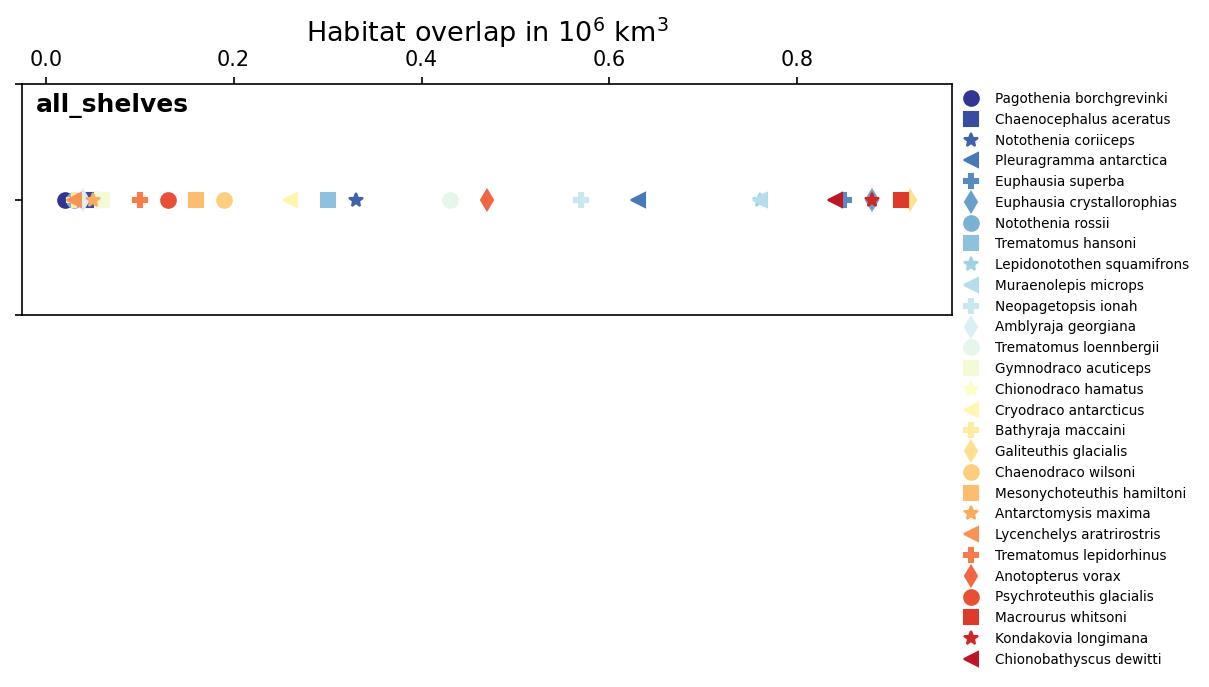

Pagothenia borchgrevinki Pagothenia borchgrevinki 0.05
Chaenocephalus aceratus Chaenocephalus aceratus 0.25
Notothenia coriiceps Notothenia coriiceps 1.26
Pleuragramma antarctica Pleuragramma antarctica 1.6
Euphausia superba Euphausia superba 2.84
Euphausia crystallorophias Euphausia crystallorophias 2.95
Notothenia rossii Notothenia rossii 0.15
Trematomus hansoni Trematomus hansoni 1.16
Lepidonotothen squamifrons Lepidonotothen squamifrons 1.94
Muraenolepis microps Muraenolepis microps 2.05
Neopagetopsis ionah Neopagetopsis ionah 1.57
Amblyraja georgiana Amblyraja georgiana 0.23
Trematomus loennbergii Trematomus loennbergii 1.48
Gymnodraco acuticeps Gymnodraco acuticeps 0.4
Chionodraco hamatus Chionodraco hamatus 0.45
Cryodraco antarcticus Cryodraco antarcticus 0.97
Bathyraja maccaini Bathyraja maccaini 0.13
Galiteuthis glacialis Galiteuthis glacialis 6.55
Chaenodraco wilsoni Chaenodraco wilsoni 0.95
Mesonychoteuthis hamiltoni Mesonychoteuthis hamiltoni 0.93
Antarctomysis maxima Antar

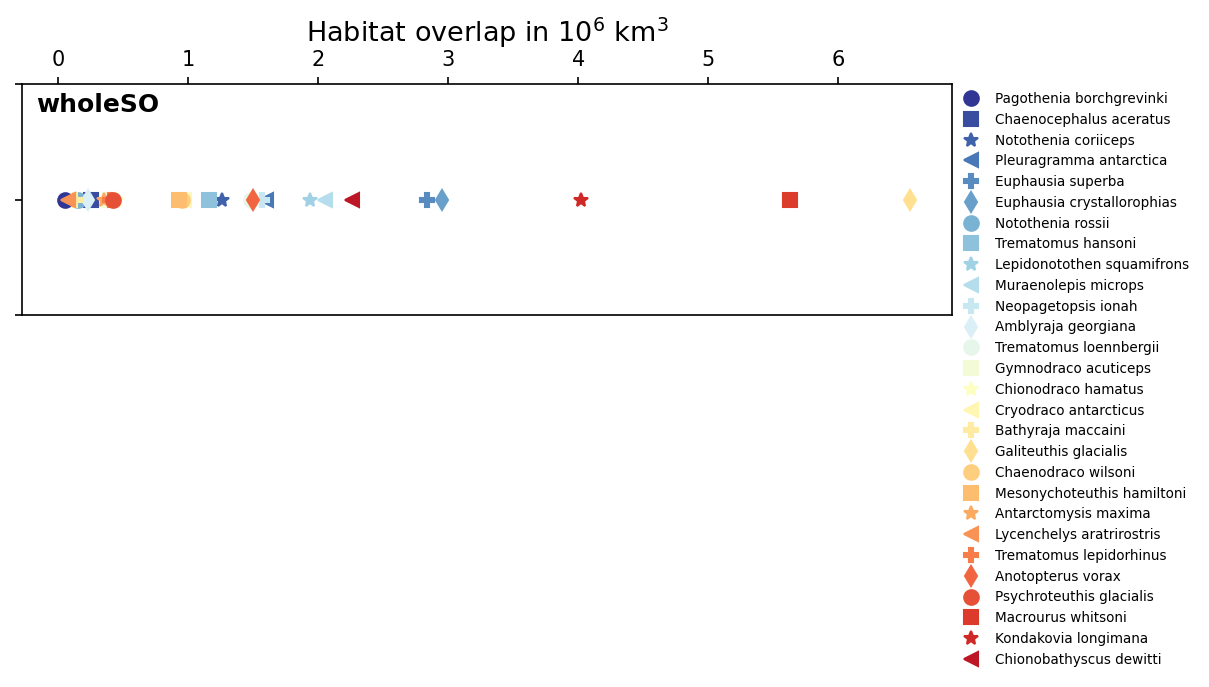

In [30]:
#----
# absolute overlap
# % of historical viable toothfish habitat (WHOLE WATER COLUMN)
#----
# -> make a plots like Fig. 7

#---
# plot
#---
    
ec = 'k'
color_line1 = 'k'
color_line2 = 'grey'
lw = 1 # for horizontal line: 100%
lw2 = 0.45 # for all other horizontal lines
width1 = 0.15
shift = 0.18
fs = 11

cm = plt.get_cmap('RdYlBu_r')
indc = np.arange(0,256+9,9)
print(indc.shape)
color_list = [cm(indc[0])[0:3],cm(indc[1])[0:3],cm(indc[2])[0:3],cm(indc[3])[0:3],cm(indc[4])[0:3],\
             cm(indc[5])[0:3],cm(indc[6])[0:3],cm(indc[7])[0:3],cm(indc[8])[0:3],cm(indc[9])[0:3],\
             cm(indc[10])[0:3],cm(indc[11])[0:3],cm(indc[12])[0:3],cm(indc[13])[0:3],cm(indc[14])[0:3],\
             cm(indc[15])[0:3],cm(indc[16])[0:3],cm(indc[17])[0:3],cm(indc[18])[0:3],cm(indc[19])[0:3],\
             cm(indc[20])[0:3],cm(indc[21])[0:3],cm(indc[22])[0:3],cm(indc[23])[0:3],cm(indc[24])[0:3],\
             cm(indc[25])[0:3],cm(indc[26])[0:3],cm(indc[27])[0:3],cm(indc[28])[0:3],cm(indc[29])[0:3]]

symbols_list = ['o','s','*','<','P','d',\
               'o','s','*','<','P','d',\
               'o','s','*','<','P','d',\
                'o','s','*','<','P','d',\
               'o','s','*','<','P','d']

save_plots = False
display_plots = True 
plot_eps = False
    
print()
print('savepath1:',savepath1)
print()

## first version
#depth_list1 = [0,250,750,1500]
#depth_list2 = [250,750,1500,3500]
# second version (guided by environmental change in toothfish habitat)
depth_list1 = [0,  400,700,1000]
depth_list2 = [400,700,1000,3500]

data_habitat_loss = np.zeros([5,len(species_names_no_toothfish),len(depth_list1)])

xlim1,xlim2 = -0.25,len(depth_list1)-0.25
ms = 7
fs = 12

factor = 1

for rr in [0,2]: #range(2,3):#,len(subregions)):
    
    #---
    # change in overlap
    #---
    fig7, ax1 = plt.subplots(num=2, figsize=(8,2), dpi=150, facecolor='w', edgecolor='k')
    
    for mm in range(0,len(species_names_no_toothfish)):
        
        ind_plot = np.where(species_list3[::-1]==species_list2[mm])[0][0] 
        
        print(species_list2[mm],species_list3[::-1][ind_plot],abs_habitat_overlap_hist[rr,ind_plot])
        
        plt.plot(abs_habitat_overlap_hist[rr,ind_plot],0,symbols_list[mm],\
                 color=color_list[mm],markersize=ms,label=species_list2[mm])
    
    plt.ylim(-0.02,0.02)
    plt.xlabel('Habitat overlap in 10$^{6}$ km$^{3}$',fontsize=fs+1)
    
    plt.yticks([-0.02,0,0.02],[])
    
    plt.legend(loc='upper center', bbox_to_anchor=(1.13, 1.02),\
                   ncol=1,fancybox=True, frameon=False,shadow=False,prop={'size': 6.5})
    plt.annotate(subregions[rr],xy=(0.015,0.88),\
                xycoords='axes fraction',fontsize=fs,ha='left',color='k',fontweight='bold')

    plt.gca().xaxis.set_label_position('top') 
    plt.gca().xaxis.tick_top()
    
    if save_plots:
        dpicnt = 150
        filename = 'Habitat_overlap'+exp_string+'_ALL_REGION_'+subregions[rr]+'_'+\
                   'future_'+str(year_future1)+'_'+str(year_future2)+'_v2_with_'+drift_string2+'.png'
        print(filename)
        plt.savefig(savepath1+filename,\
                        dpi = dpicnt, bbox_inches='tight')

    if display_plots:
        plt.show()
    else:
        plt.close(fig7)
        
        # 0.9671442
        
        # 95.1
        # 2.07

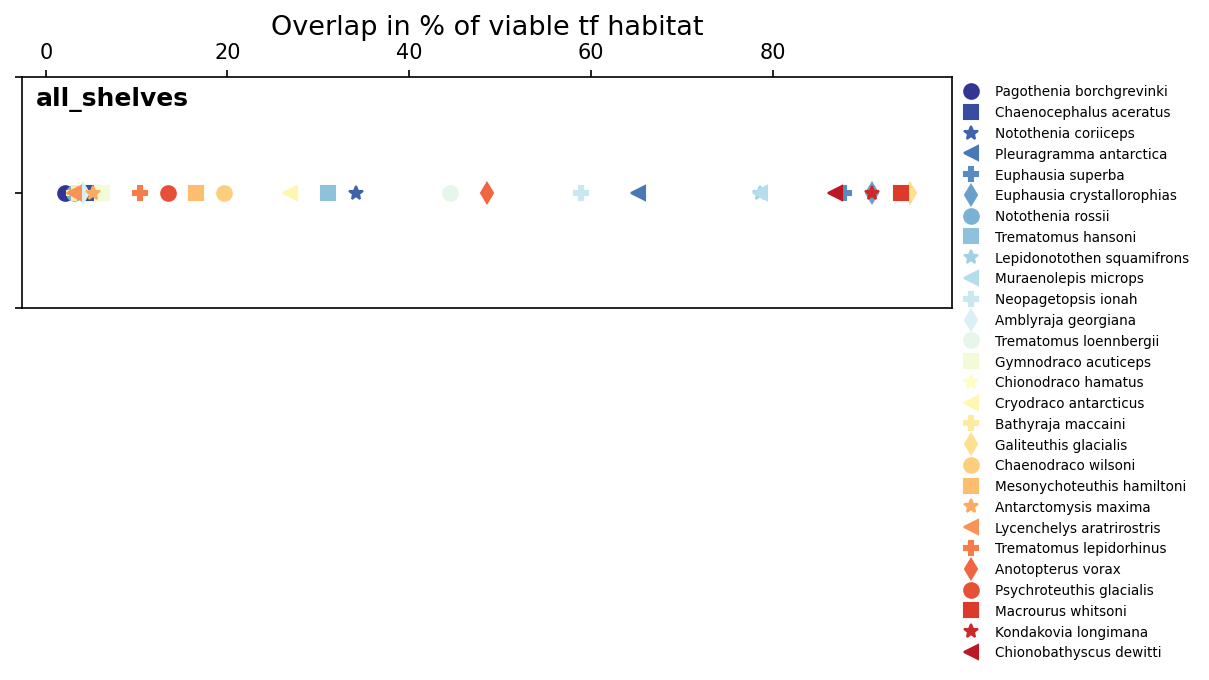

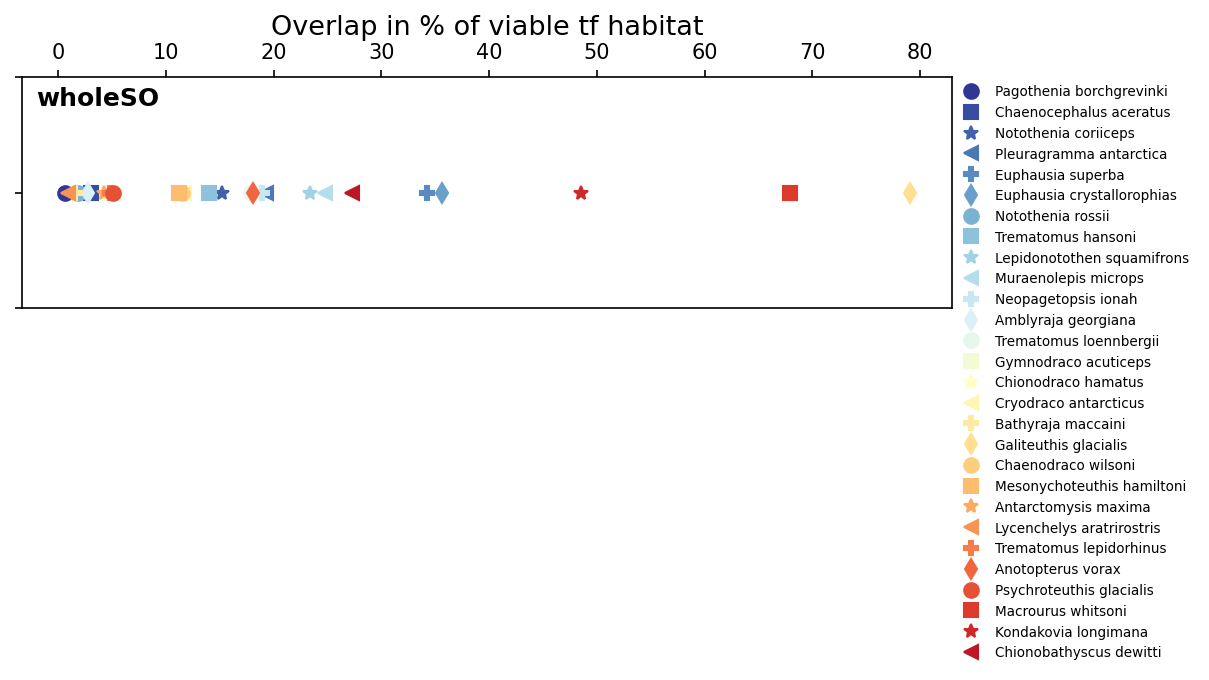

In [22]:

for rr in [0,2]: #range(2,3):#,len(subregions)):
    
    #---
    # change in overlap
    #---
    fig7, ax1 = plt.subplots(num=2, figsize=(8,2), dpi=150, facecolor='w', edgecolor='k')
    
    for mm in range(0,len(species_names_no_toothfish)):
        
        ind_plot = np.where(species_list3[::-1]==species_list2[mm])[0][0] 
        #print(species_list2[mm],species_list3[::-1][ind_plot])
        
        plt.plot(perc_of_tf_habitat[rr,ind_plot],0,symbols_list[mm],\
                 color=color_list[mm],markersize=ms,label=species_list2[mm])
    
    plt.ylim(-0.02,0.02)
    plt.xlabel('Overlap in % of viable tf habitat',fontsize=fs+1)
    
    plt.yticks([-0.02,0,0.02],[])
    
    plt.legend(loc='upper center', bbox_to_anchor=(1.13, 1.02),\
                   ncol=1,fancybox=True, frameon=False,shadow=False,prop={'size': 6.5})
    plt.annotate(subregions[rr],xy=(0.015,0.88),\
                xycoords='axes fraction',fontsize=fs,ha='left',color='k',fontweight='bold')

    plt.gca().xaxis.set_label_position('top') 
    plt.gca().xaxis.tick_top()
    
    if save_plots:
        dpicnt = 150
        filename = 'Habitat_overlap'+exp_string+'_ALL_REGION_'+subregions[rr]+'_'+\
                   'future_'+str(year_future1)+'_'+str(year_future2)+'_v2_with_'+drift_string2+'.png'
        print(filename)
        plt.savefig(savepath1+filename,\
                        dpi = dpicnt, bbox_inches='tight')

    if display_plots:
        plt.show()
    else:
        plt.close(fig7)
        
        

all_shelves
[0.92 0.91 0.88 0.88 0.85 0.84 0.76 0.76 0.63 0.57 0.47 0.43 0.33 0.3
 0.26 0.19 0.16 0.16 0.13 0.1  0.06 0.05 0.05 0.04 0.03 0.03 0.03 0.02]
[0.92 0.9  0.88 0.88 0.84 0.83 0.76 0.75 0.63 0.56 0.47 0.43 0.33 0.3
 0.25 0.18 0.16 0.16 0.13 0.1  0.06 0.05 0.05 0.04 0.03 0.03 0.03 0.02]
Habitat_overlap_historical_with_ssp585_absolute_ALL_REGION_all_shelves_v2_with_drift_corrected_2091_2100_minus_1995_2014.png


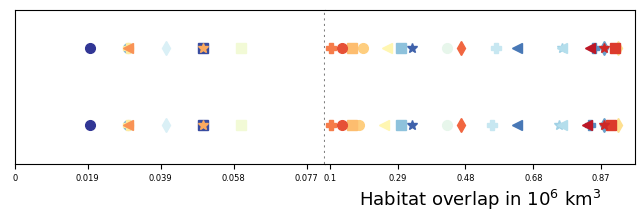

Habitat_overlap_historical_with_ssp585_absolute_ALL_REGION_all_shelves_v2_with_drift_corrected_2091_2100_minus_1995_2014.eps


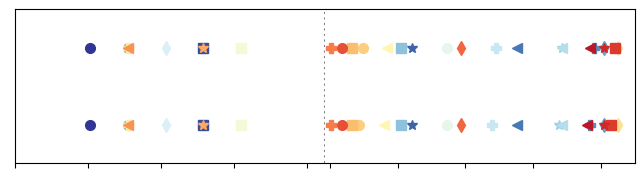

wholeSO
[6.55 5.63 4.02 2.95 2.84 2.26 2.05 1.94 1.6  1.57 1.5  1.48 1.26 1.16
 0.97 0.95 0.93 0.45 0.42 0.4  0.4  0.35 0.25 0.23 0.15 0.13 0.08 0.05]
[6.09 5.26 3.69 2.7  2.65 1.9  2.   1.9  1.5  1.5  1.24 1.39 1.27 1.17
 0.96 0.92 0.77 0.46 0.41 0.4  0.41 0.35 0.26 0.23 0.15 0.14 0.08 0.05]
Habitat_overlap_historical_with_ssp585_absolute_ALL_REGION_wholeSO_v2_with_drift_corrected_2091_2100_minus_1995_2014.png


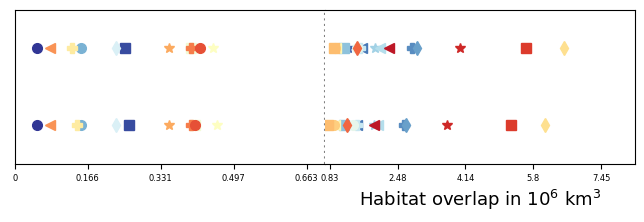

Habitat_overlap_historical_with_ssp585_absolute_ALL_REGION_wholeSO_v2_with_drift_corrected_2091_2100_minus_1995_2014.eps


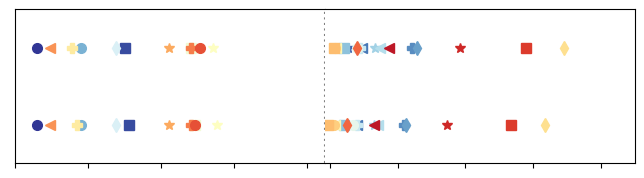

In [23]:
#----
# non-linear x axis; ABS. HABITAT OVERLAP
#----
save_plots = True
plot_eps = True

for rr in [0,2]:
    print(subregions[rr])
    print(abs_habitat_overlap_hist[rr,:])
    print(abs_habitat_overlap_ssp585[rr,:])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,2), sharey=True, gridspec_kw={'wspace': 0})

    # x limits of the axes
    if subregions[rr]=='all_shelves':
        xlim1 = (0,0.085*habitat_tf_list[rr]) # 8.5% is where the split is for rel. plot
        xlim2 = (0.085*habitat_tf_list[rr],habitat_tf_list[rr])
    else:
        xlim1 = (0,0.085*habitat_tf_list[rr])
        xlim2 = (0.085*habitat_tf_list[rr],habitat_tf_list[rr])

    # plot the same data in both axes
    for mm in range(0,len(species_names_no_toothfish)): 
        ind_plot = np.where(species_list3[::-1]==species_list2[mm])[0][0] 
        ax1.plot(abs_habitat_overlap_hist[rr,ind_plot],0.2,symbols_list[mm],\
                     color=color_list[mm],markersize=ms,label=species_list2[mm])
        ax2.plot(abs_habitat_overlap_hist[rr,ind_plot],0.2,symbols_list[mm],\
                     color=color_list[mm],markersize=ms,label=species_list2[mm])
        # scenarios
        ax1.plot(abs_habitat_overlap_ssp585[rr,ind_plot],0,symbols_list[mm],\
                     color=color_list[mm],markersize=ms,label=species_list2[mm])
        ax2.plot(abs_habitat_overlap_ssp585[rr,ind_plot],0,symbols_list[mm],\
                     color=color_list[mm],markersize=ms,label=species_list2[mm])
        
    # hide the spines and ticks
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.tick_params(axis='y', left=False)

    # set the x limits
    ax1.set_xlim(xlim1)
    ax2.set_xlim(xlim2)

    ff0 = 1000
    ax1.set_xticks([0,0.02*habitat_tf_list[rr],0.04*habitat_tf_list[rr],0.06*habitat_tf_list[rr],0.08*habitat_tf_list[rr]])
    ax1.set_xticklabels([0,np.round(ff0*0.02*habitat_tf_list[rr])/ff0,\
                         np.round(ff0*0.04*habitat_tf_list[rr])/ff0,\
                         np.round(ff0*0.06*habitat_tf_list[rr])/ff0,np.round(ff0*0.08*habitat_tf_list[rr])/ff0])

    ff0 = 100
    ax2.set_xticks([0.1*habitat_tf_list[rr],0.3*habitat_tf_list[rr],\
                    0.5*habitat_tf_list[rr],0.7*habitat_tf_list[rr],0.9*habitat_tf_list[rr]])
    ax2.set_xticklabels([np.round(ff0*0.1*habitat_tf_list[rr])/ff0,np.round(ff0*0.3*habitat_tf_list[rr])/ff0,\
                    np.round(ff0*0.5*habitat_tf_list[rr])/ff0,np.round(ff0*0.7*habitat_tf_list[rr])/ff0,\
                         np.round(ff0*0.9*habitat_tf_list[rr])/ff0])

    ax1.set_ylim([-0.1,0.3])
    ax2.set_ylim([-0.1,0.3])
    ax1.set_yticks([])
    ax2.set_yticks([])
    ax1.set_yticklabels([])
    ax2.set_yticklabels([])
    
    ax1.tick_params(axis='both', which='major', labelsize=6)
    ax2.tick_params(axis='both', which='major', labelsize=6)

    ax2.set_xlabel('Habitat overlap in 10$^{6}$ km$^{3}$',fontsize=fs+1)

    # add line to indicate the change in x scale
    ax1.axvline(xlim1[1], clip_on=False, color='gray', linestyle=':')

    if save_plots:
        dpicnt = 150
        filename = 'Habitat_overlap_historical_with_ssp585_absolute'+exp_string+'_ALL_REGION_'+subregions[rr]+\
                   '_v2_with_'+drift_string2+'.png'
        print(filename)
        plt.savefig(savepath1+filename,\
                        dpi = dpicnt, bbox_inches='tight')
        
    plt.show()
    
    #---
    # eps
    #---
    if plot_eps:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,2), sharey=True, gridspec_kw={'wspace': 0})

        # x limits of the axes
        if subregions[rr]=='all_shelves':
            xlim1 = (0,0.085*habitat_tf_list[rr]) # 8.5% is where the split is for rel. plot
            xlim2 = (0.085*habitat_tf_list[rr],habitat_tf_list[rr])
        else:
            xlim1 = (0,0.085*habitat_tf_list[rr])
            xlim2 = (0.085*habitat_tf_list[rr],habitat_tf_list[rr])

        # plot the same data in both axes
        for mm in range(0,len(species_names_no_toothfish)): 
            ind_plot = np.where(species_list3[::-1]==species_list2[mm])[0][0] 
            ax1.plot(abs_habitat_overlap_hist[rr,ind_plot],0.2,symbols_list[mm],\
                         color=color_list[mm],markersize=ms,label=species_list2[mm])
            ax2.plot(abs_habitat_overlap_hist[rr,ind_plot],0.2,symbols_list[mm],\
                         color=color_list[mm],markersize=ms,label=species_list2[mm])
            # scenarios
            ax1.plot(abs_habitat_overlap_ssp585[rr,ind_plot],0,symbols_list[mm],\
                         color=color_list[mm],markersize=ms,label=species_list2[mm])
            ax2.plot(abs_habitat_overlap_ssp585[rr,ind_plot],0,symbols_list[mm],\
                     color=color_list[mm],markersize=ms,label=species_list2[mm])

        # hide the spines and ticks
        ax1.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.tick_params(axis='y', left=False)

        # set the x limits
        ax1.set_xlim(xlim1)
        ax2.set_xlim(xlim2)

        ff0 = 1000
        ax1.set_xticks([0,0.02*habitat_tf_list[rr],0.04*habitat_tf_list[rr],0.06*habitat_tf_list[rr],0.08*habitat_tf_list[rr]])
        ax1.set_xticklabels([])

        ff0 = 100
        ax2.set_xticks([0.1*habitat_tf_list[rr],0.3*habitat_tf_list[rr],\
                        0.5*habitat_tf_list[rr],0.7*habitat_tf_list[rr],0.9*habitat_tf_list[rr]])
        ax2.set_xticklabels([])

        ax1.set_ylim([-0.1,0.3])
        ax2.set_ylim([-0.1,0.3])
        ax1.set_yticks([])
        ax2.set_yticks([])
        ax1.set_yticklabels([])
        ax2.set_yticklabels([])

        ax1.tick_params(axis='both', which='major', labelsize=6)
        ax2.tick_params(axis='both', which='major', labelsize=6)

        # add line to indicate the change in x scale
        ax1.axvline(xlim1[1], clip_on=False, color='gray', linestyle=':')

        if save_plots:
            dpicnt = 150
            filename = 'Habitat_overlap_historical_with_ssp585_absolute'+exp_string+'_ALL_REGION_'+subregions[rr]+\
                       '_v2_with_'+drift_string2+'.eps'
            print(filename)
            plt.savefig(savepath1+filename,\
                            dpi = dpicnt, bbox_inches='tight',format='eps')
        plt.show()


all_shelves
[95.12542183 94.09144986 90.98953393 90.98953393 87.887618   86.85364602
 78.58187021 78.58187021 65.14023452 58.93640266 48.59668289 44.46079499
 34.12107522 31.01915929 26.88327139 19.64546755 16.54355162 16.54355162
 13.44163569 10.33971976  6.20383186  5.16985988  5.16985988  4.13588791
  3.10191593  3.10191593  3.10191593  2.06794395]
Habitat_overlap_historical_with_ssp585_rel_to_tf_habitat_ALL_REGION_all_shelves_v2_with_drift_corrected_2091_2100_minus_1995_2014.png


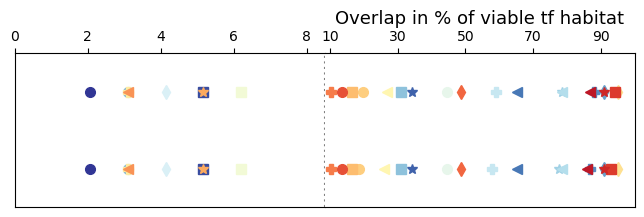

Habitat_overlap_historical_with_ssp585_rel_to_tf_habitat_ALL_REGION_all_shelves_v2_with_drift_corrected_2091_2100_minus_1995_2014.eps


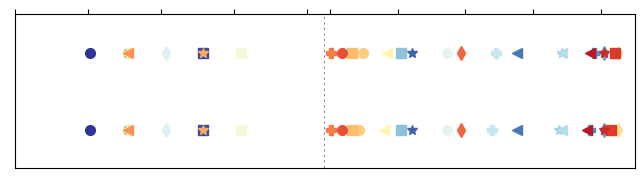

wholeSO
[79.07495581 67.96824446 48.5314996  35.6139114  34.28593504 27.28387788
 24.74865029 23.42067394 19.31601974 18.95384437 18.10876851 17.86731826
 15.21136555 14.00411431 11.71033697 11.46888672 11.22743647  5.43263055
  5.07045518  4.82900494  4.82900494  4.22537932  3.01812808  2.77667784
  1.81087685  1.5694266   0.96580099  0.60362562]
Habitat_overlap_historical_with_ssp585_rel_to_tf_habitat_ALL_REGION_wholeSO_v2_with_drift_corrected_2091_2100_minus_1995_2014.png


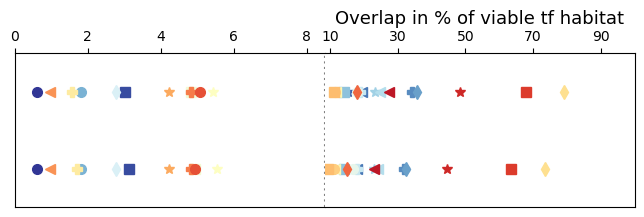

Habitat_overlap_historical_with_ssp585_rel_to_tf_habitat_ALL_REGION_wholeSO_v2_with_drift_corrected_2091_2100_minus_1995_2014.eps


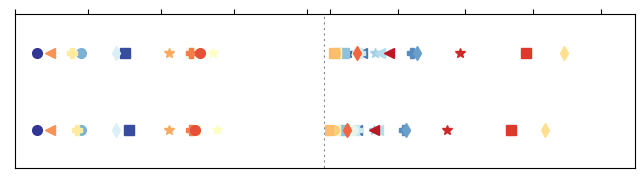

In [24]:
#----
# non-linear x axis; PERCENT OF TF HABITAT
#----

for rr in [0,2]:
    print(subregions[rr])
    print(perc_of_tf_habitat[rr,:])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,2), sharey=True, gridspec_kw={'wspace': 0})

    # x limits of the axes
    xlim1 = (0, 8.5)
    xlim2 = (8.5, 100)

    # plot the same data in both axes
    for mm in range(0,len(species_names_no_toothfish)): 
        ind_plot = np.where(species_list3[::-1]==species_list2[mm])[0][0] 
        ax1.plot(perc_of_tf_habitat[rr,ind_plot],0.2,symbols_list[mm],\
                     color=color_list[mm],markersize=ms,label=species_list2[mm])
        ax2.plot(perc_of_tf_habitat[rr,ind_plot],0.2,symbols_list[mm],\
                     color=color_list[mm],markersize=ms,label=species_list2[mm])
        # scenarios
        ax1.plot(perc_of_tf_habitat_585[rr,ind_plot],0,symbols_list[mm],\
                     color=color_list[mm],markersize=ms,label=species_list2[mm])
        ax2.plot(perc_of_tf_habitat_585[rr,ind_plot],0,symbols_list[mm],\
                     color=color_list[mm],markersize=ms,label=species_list2[mm])

    # hide the spines and ticks
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.tick_params(axis='y', left=False)

    # set the x limits
    ax1.set_xlim(xlim1)
    ax2.set_xlim(xlim2)

    ax1.set_xticks([0,2,4,6,8])
    ax1.set_xticklabels([0,2,4,6,8])

    ax2.set_xticks([10,30,50,70,90])
    ax2.set_xticklabels([10,30,50,70,90])

    ax1.set_ylim([-0.1,0.3])
    ax2.set_ylim([-0.1,0.3])
    ax1.set_yticks([])
    ax2.set_yticks([])
    ax1.set_yticklabels([])
    ax2.set_yticklabels([])

    ax2.set_xlabel('Overlap in % of viable tf habitat',fontsize=fs+1)

    # add line to indicate the change in x scale
    #ax1.axvline(9, clip_on=False, color='gray', linestyle=':')
    ax1.axvline(xlim1[1], clip_on=False, color='gray', linestyle=':')

    ax1.xaxis.set_label_position('top') 
    ax1.xaxis.tick_top()
    ax2.xaxis.set_label_position('top') 
    ax2.xaxis.tick_top()
    
    if save_plots:
        dpicnt = 150
        filename = 'Habitat_overlap_historical_with_ssp585_rel_to_tf_habitat'+exp_string+'_ALL_REGION_'+subregions[rr]+\
                   '_v2_with_'+drift_string2+'.png'
        print(filename)
        plt.savefig(savepath1+filename,\
                        dpi = dpicnt, bbox_inches='tight')
        
    plt.show()
    
    #---
    # eps
    #---
    if plot_eps:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,2), sharey=True, gridspec_kw={'wspace': 0})

        # x limits of the axes
        xlim1 = (0, 8.5)
        xlim2 = (8.5, 100)

        # plot the same data in both axes
        for mm in range(0,len(species_names_no_toothfish)): 
            ind_plot = np.where(species_list3[::-1]==species_list2[mm])[0][0] 
            ax1.plot(perc_of_tf_habitat[rr,ind_plot],0.2,symbols_list[mm],\
                         color=color_list[mm],markersize=ms,label=species_list2[mm])
            ax2.plot(perc_of_tf_habitat[rr,ind_plot],0.2,symbols_list[mm],\
                         color=color_list[mm],markersize=ms,label=species_list2[mm])
            # scenarios
            ax1.plot(perc_of_tf_habitat_585[rr,ind_plot],0,symbols_list[mm],\
                         color=color_list[mm],markersize=ms,label=species_list2[mm])
            ax2.plot(perc_of_tf_habitat_585[rr,ind_plot],0,symbols_list[mm],\
                         color=color_list[mm],markersize=ms,label=species_list2[mm])

        # hide the spines and ticks
        ax1.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.tick_params(axis='y', left=False)

        # set the x limits
        ax1.set_xlim(xlim1)
        ax2.set_xlim(xlim2)

        ax1.set_xticks([0,2,4,6,8])
        ax1.set_xticklabels([])

        ax2.set_xticks([10,30,50,70,90])
        ax2.set_xticklabels([])

        ax1.set_ylim([-0.1,0.3])
        ax2.set_ylim([-0.1,0.3])
        ax1.set_yticks([])
        ax2.set_yticks([])
        ax1.set_yticklabels([])
        ax2.set_yticklabels([])

        # add line to indicate the change in x scale
        #ax1.axvline(9, clip_on=False, color='gray', linestyle=':')
        ax1.axvline(xlim1[1], clip_on=False, color='gray', linestyle=':')

        ax1.xaxis.set_label_position('top') 
        ax1.xaxis.tick_top()
        ax2.xaxis.set_label_position('top') 
        ax2.xaxis.tick_top()

        if save_plots:
            dpicnt = 150
            filename = 'Habitat_overlap_historical_with_ssp585_rel_to_tf_habitat'+exp_string+'_ALL_REGION_'+subregions[rr]+\
                       '_v2_with_'+drift_string2+'.eps'
            print(filename)
            plt.savefig(savepath1+filename,\
                            dpi = dpicnt, bbox_inches='tight',format='eps')
        plt.show()


In [25]:
print(savepath1)

/global/cfs/cdirs/m4003/cnissen/Plots/AGI_project/habitat_overlap_v4_with_drift_corr/


In [26]:

#print(species_names_)

species_names_sorted = sorted(species_names_, key=len)[::-1]


path1 = '/pscratch/sd/c/cnissen/AGI_toothfish_project/new_thresholds/'
print('Species name','            ','\t','Tpref','    ','\t','o2thresh','\t','agi_crit')

for sp in range(0,len(species_names_sorted)):
    
    ff   = xr.open_dataset(path1+'Tpref_'+species_names_sorted[sp]+'_based_on_monthly_clim_1995_2014.nc')
    tpref = ff['Tpref'].values[0]
    ff.close()
    
    ff   = xr.open_dataset(path1+'o2thresh_'+species_names_sorted[sp]+'_based_on_monthly_clim_1995_2014.nc')
    o2thresh = ff['o2thresh'].values[0]
    ff.close()
    
    ff   = xr.open_dataset(path1+'AGIcrit_'+species_names_sorted[sp]+'_based_on_monthly_clim_1995_2014.nc')
    agi_crit = ff['AGIcrit'].values[0]
    ff.close()
    
    if len(species_names_sorted[sp])<=22: # add some more spaces to align columns
        print(species_names_sorted[sp],'       ','\t',tpref,'\t',o2thresh,'\t',agi_crit)
    else:
        print(species_names_sorted[sp],'\t',tpref,'\t',o2thresh,'\t',agi_crit)


Species name              	 Tpref      	 o2thresh 	 agi_crit
Euphausia_crystallorophias 	 0.5450572 	 116.58925 	 1.2839987
Mesonychoteuthis_hamiltoni 	 2.7967002 	 116.96987 	 1.3957235
Lepidonotothen_squamifrons 	 -0.2555468 	 122.778336 	 1.1738452
Lycenchelys_aratrirostris 	 -0.7608829 	 119.89406 	 1.3124833
Pagothenia_borchgrevinki 	 -1.5339466 	 160.46292 	 1.4039235
Psychroteuthis_glacialis 	 0.027250621 	 119.650154 	 1.1889902
Chionobathyscus_dewitti 	 -0.13192704 	 120.55363 	 1.3595318
Chaenocephalus_aceratus 	 0.21791792 	 118.69862 	 1.2478297
Trematomus_lepidorhinus 	 -0.65436655 	 122.26245 	 1.3375062
Pleuragramma_antarctica 	 -0.76842755 	 125.15364 	 1.3371667
Trematomus_loennbergii         	 -0.7120701 	 123.19014 	 1.3390833
Cryodraco_antarcticus         	 -0.81476945 	 126.31232 	 1.3318573
Galiteuthis_glacialis         	 9.911434 	 121.32877 	 1.9235835
Notothenia_coriiceps         	 -0.7346509 	 127.107544 	 1.2162714
Antarctomysis_maxima         	 -0.25362578 	

In [27]:


print(len('Trematomus_loennbergii'))



22


In [28]:

pH1 = 8.0
pH2 = pH1 - 0.2

aux1 = 10**(-1*pH1)
aux2 = 10**(-1*pH2)
print(aux1,aux2,aux2/aux1)

    

1e-08 1.5848931924611143e-08 1.5848931924611143
